In [1]:
print("Importing Required Libraries")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
print("All the required libraries are imported")

Importing Required Libraries
All the required libraries are imported


In [2]:
print("Now , we have to analyze the data ")      

Now , we have to analyze the data 


In [3]:
print('We should go through these steps from')
print('Step 1 : Data Scouring') 
print('Step 2 : Data Cleaning') 
print('Step 3 : Bivariate Analysis') 
# print('Step 4 : Univariate Analysis') 


We should go through these steps from
Step 1 : Data Scouring
Step 2 : Data Cleaning
Step 3 : Bivariate Analysis


## Step 1 : Data sourcing

In [4]:
print('Step 1')
print('Data Sourcing') 
df = pd.read_csv('train_dataset.csv' )   
print('Data is Imported Successfully !')    
df   

Step 1
Data Sourcing
Data is Imported Successfully !


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


## Data scouring is completed

### Step 2 : Data Cleaning 

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()  

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## In these dataset education and previous_year_ratings are the columns which are having null values , Now are can see the data where these values are null 

In [7]:
df.groupby(['education','is_promoted'])['is_promoted'].count()     

education         is_promoted
Bachelor's        0              33661
                  1               3008
Below Secondary   0                738
                  1                 67
Master's & above  0              13454
                  1               1471
Name: is_promoted, dtype: int64

### Now , we are going to analyze the education attribute for missing values throw bar graph

<Axes: xlabel='education', ylabel='count'>

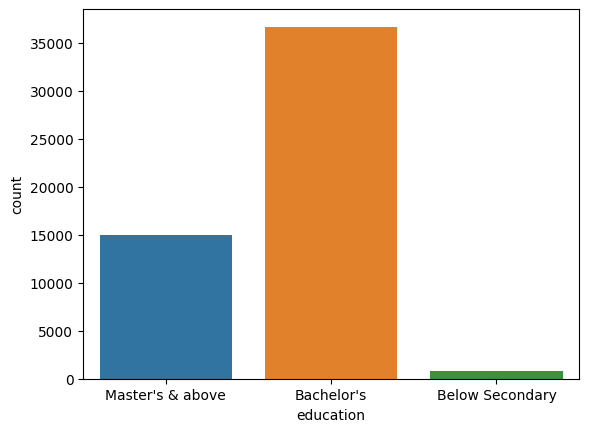

In [8]:
sns.countplot(data = df , x = 'education')  

#### In MNC most of the employees have done Bachelor's education , Master's & Above education very least employees are Below secondary .

In [9]:
df['education'].unique() 

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

## But, in this countplot it was not showing the count for the null values that's why , I am imputing the null values with the Education unknown value.

In [10]:
df['education'].isnull().sum() 

2409

In [11]:
df.loc[
       (df['education']!='Bachelor\'s') 
       & 
       (df['education'] != 'Master\'s & above') 
       & 
       (df['education'] != 'Below Secondary') , 'education' 
       ]   = 'Education unknown'

In [12]:
df['education'].unique() 

array(["Master's & above", "Bachelor's", 'Education unknown',
       'Below Secondary'], dtype=object)

## Now, I am using countplot to analyze

(array([0, 1, 2, 3]),
 [Text(0, 0, "Master's & above"),
  Text(1, 0, "Bachelor's"),
  Text(2, 0, 'Education unknown'),
  Text(3, 0, 'Below Secondary')])

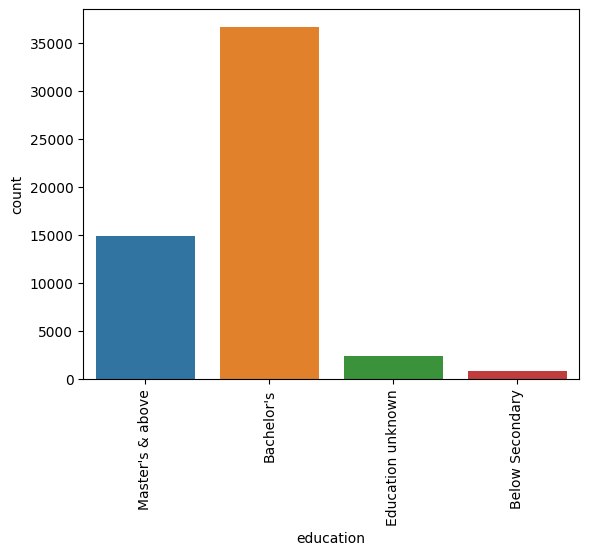

In [13]:
sns.countplot( data = df , x = 'education' ) 
plt.xticks(rotation = 90) 

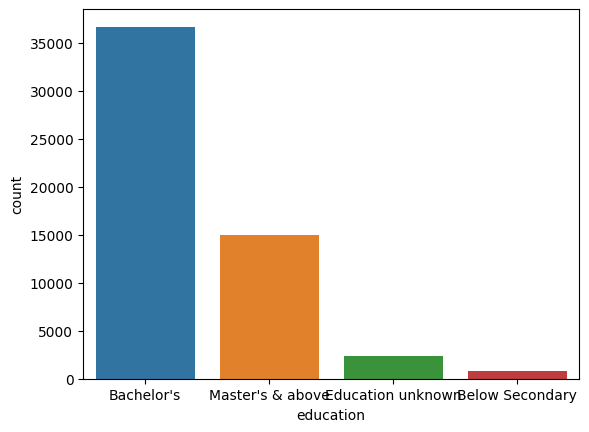

In [14]:
ax = sns.countplot(x = df['education'] , order = df['education'].value_counts(ascending = False).index)  

(array([0, 1, 2, 3]),
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, "Master's & above"),
  Text(2, 0, 'Education unknown'),
  Text(3, 0, 'Below Secondary')])

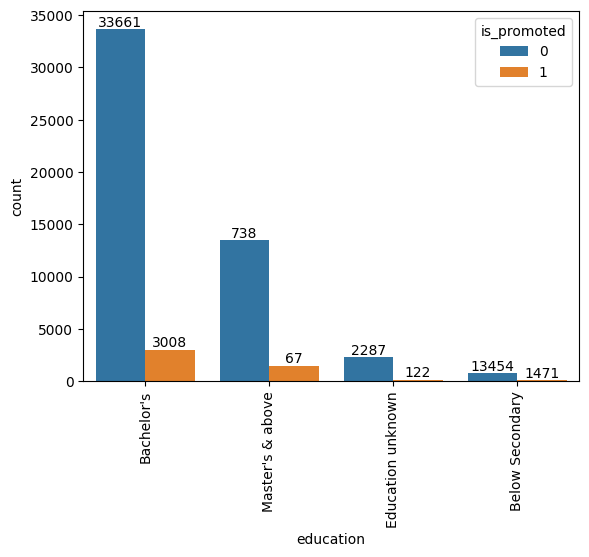

In [15]:
ax = sns.countplot(x = df['education'] , 
                 order = df['education'].value_counts(ascending = False).index , 
                  hue = df['is_promoted']) 

label_values = df.groupby(['education','is_promoted'])['is_promoted'].count() 

ax.bar_label( container = ax.containers[0] , labels = label_values[0::2].values )  

ax.bar_label( container = ax.containers[1] , labels = label_values[1::2].values ) 

plt.xticks(rotation = 90)

#### After seeing this graph , I observe that employees which have not mentioned their education have also got promoted

In [16]:
df.loc[ (df['education'] == 'Education unknown') & (df['is_promoted'] == 1)]  

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
323,45496,Sales & Marketing,region_2,Education unknown,m,other,1,22,5.0,2,0,0,62,1
359,36936,Sales & Marketing,region_28,Education unknown,m,other,1,24,2.0,2,1,0,52,1
574,20516,Sales & Marketing,region_2,Education unknown,m,other,1,24,3.0,2,1,1,81,1
867,35744,Sales & Marketing,region_28,Education unknown,m,other,1,25,4.0,3,1,0,64,1
1585,44105,Sales & Marketing,region_28,Education unknown,m,other,1,34,5.0,7,1,0,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52123,54789,Sales & Marketing,region_2,Education unknown,m,sourcing,1,24,4.0,3,1,1,92,1
53064,38040,Sales & Marketing,region_2,Education unknown,m,other,1,32,5.0,5,1,0,48,1
53612,45589,Sales & Marketing,region_22,Education unknown,m,other,1,24,4.0,2,0,0,98,1
53695,49659,HR,region_2,Education unknown,m,sourcing,1,33,4.0,8,1,0,48,1


### As per your promotion selection parameters here , promotions is given to the KPIs and average_training_score now we have to are checking for it .  

In [17]:
df_education = df.loc[ (df['education'] == 'Education unknown') ] 

In [18]:
df_education 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Education unknown,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,Education unknown,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,Education unknown,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,Education unknown,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,Education unknown,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,Education unknown,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,Education unknown,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,Education unknown,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,Education unknown,m,other,1,28,4.0,3,0,0,47,0


In [19]:
df_educated_promoted = df_education.loc[ df['is_promoted'] == 1 ]  

In [20]:
df_educated_promoted.loc[ (df_educated_promoted['KPIs_met >80%'] == 1) | (df_educated_promoted['avg_training_score'] > 60) ] 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
323,45496,Sales & Marketing,region_2,Education unknown,m,other,1,22,5.0,2,0,0,62,1
359,36936,Sales & Marketing,region_28,Education unknown,m,other,1,24,2.0,2,1,0,52,1
574,20516,Sales & Marketing,region_2,Education unknown,m,other,1,24,3.0,2,1,1,81,1
867,35744,Sales & Marketing,region_28,Education unknown,m,other,1,25,4.0,3,1,0,64,1
1585,44105,Sales & Marketing,region_28,Education unknown,m,other,1,34,5.0,7,1,0,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52123,54789,Sales & Marketing,region_2,Education unknown,m,sourcing,1,24,4.0,3,1,1,92,1
53064,38040,Sales & Marketing,region_2,Education unknown,m,other,1,32,5.0,5,1,0,48,1
53612,45589,Sales & Marketing,region_22,Education unknown,m,other,1,24,4.0,2,0,0,98,1
53695,49659,HR,region_2,Education unknown,m,sourcing,1,33,4.0,8,1,0,48,1


### Only 1 employee from education unknown is promoted .

In [21]:
df_educated_promoted.loc[ 
                         (df_educated_promoted['KPIs_met >80%'] == 0) 
                         &
                         (df_educated_promoted['avg_training_score'] < 60) 
                         ] 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
38617,66237,Sales & Marketing,region_31,Education unknown,m,other,1,28,5.0,5,0,1,59,1


### Employee ID 38617 is promoted without considering the paramaters stated by the company he is not educated 

In [22]:
df.isnull().sum()
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Here , it will not affect our dataset because there is no need to worry about the data of educated unknown because in our question , we have to solve the problem for the Manager level of people .

## There can be various reasons why they are not showing the education :
#### 1. Maybe Employee is not educated. 
#### 2. Employee is educated less than class SSC. 
#### 3. Employees is on very lower level in MNC .
#### 4. Employee is at Security Guard or Cleaner or Local Servant position  , it can also be the reason why education is not mentioned. 

# Now , we analyze the missing values of the  column previous_year_rating 

In [23]:
df.loc[ ( df['previous_year_rating'] != 1.0 )
       & 
        ( df['previous_year_rating'] != 2.0 )
       &
        ( df['previous_year_rating'] != 3.0 )
       & 
        ( df['previous_year_rating'] != 4.0 )
       & 
        ( df['previous_year_rating'] != 5.0 ) 
      ]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Education unknown,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [24]:
previous_year_rating_null_values = df.loc[ ( df['previous_year_rating'] != 1.0 )
       & 
        ( df['previous_year_rating'] != 2.0 )
       &
        ( df['previous_year_rating'] != 3.0 )
       & 
        ( df['previous_year_rating'] != 4.0 )
       & 
        ( df['previous_year_rating'] != 5.0 ) 
      ]

In [25]:
previous_year_rating_null_values.shape 

(4124, 14)

## Number of rows null rows in the column previous year rating 

## The reason behind the null values in previous year rating columns can also the joinning of employees is only 1 year or less than 1 year. 

In [26]:
previous_year_rating_null_values.loc[ previous_year_rating_null_values['length_of_service'] == 1 ].shape  

(4124, 14)

#### Here the null rows are there only because the lenght_of_service of those employees less than or equal to 1 .
#### We all know that very well that , if employee has spent less than 1  year in the company then , who his previous_average_rating can be there.

### Now, we are going to analyze on the basis of their education weather it is depends upon their education . 


<Axes: xlabel='education', ylabel='count'>

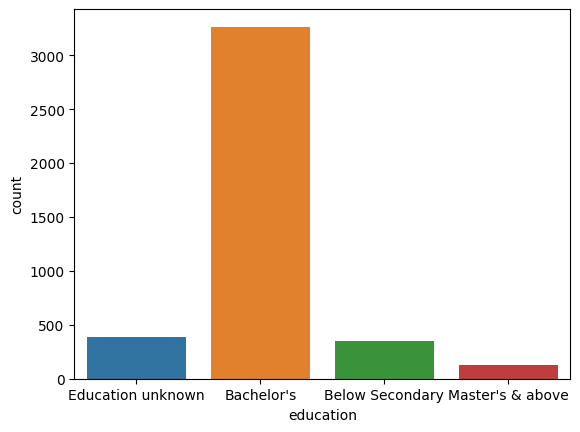

In [27]:
sns.countplot(data = previous_year_rating_null_values , x = 'education' )  

In [28]:
previous_ratingss = previous_year_rating_null_values.groupby(['education'])['education'].count() / previous_year_rating_null_values.groupby(['education'])['education'].count().sum() * 100 

In [29]:
previous_ratingss

education
Bachelor's           79.170708
Below Secondary       8.414161
Education unknown     9.335597
Master's & above      3.079534
Name: education, dtype: float64

In [30]:
previous_rating = pd.DataFrame(previous_ratingss)  


In [31]:
previous_rating.index

Index(['Bachelor's', 'Below Secondary', 'Education unknown',
       'Master's & above'],
      dtype='object', name='education')

In [32]:
x_axis = previous_rating.index 
y_axis = previous_rating.values

In [33]:
x_axis_list = [] 
y_axis_list = [] 
for i in x_axis:
    x_axis_list.append(i) 
for j in y_axis:
    y_axis_list.append(round(float(j),2)) 


In [34]:
print(x_axis_list)  

["Bachelor's", 'Below Secondary', 'Education unknown', "Master's & above"]


In [35]:
print(y_axis_list)  

[79.17, 8.41, 9.34, 3.08]


[Text(0, 0, '79.17'),
 Text(0, 0, '8.41'),
 Text(0, 0, '9.34'),
 Text(0, 0, '3.08')]

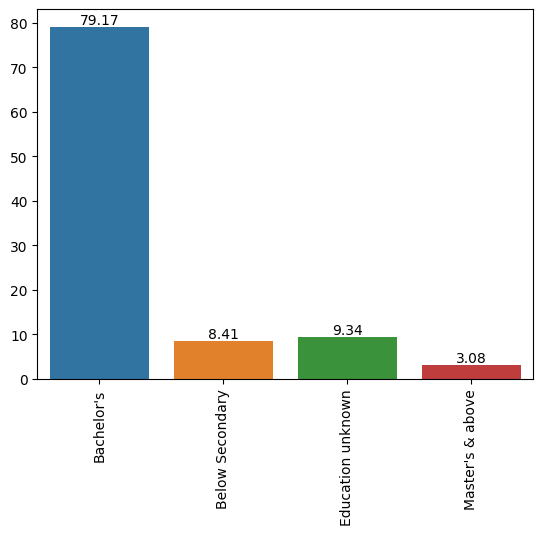

In [36]:
ax = sns.barplot(x = x_axis_list , y = y_axis_list) 
plt.xticks(rotation = 90) 
ax.bar_label( container = ax.containers[0] , labels = y_axis_list)

### We have seen here that employees whose education is (Education unknown) , there on the second position whose lenght of service is 1 or less than 1 year. 

In [37]:
previous_year_rates_bars = previous_year_rating_null_values.groupby(['education','is_promoted'])['is_promoted'].count() / previous_year_rating_null_values.groupby(['education','is_promoted'])['is_promoted'].count().sum() * 100

In [38]:
previous_year_rates_bars  = pd.DataFrame(previous_year_rates_bars )

In [39]:
previous_year_rates_bars

is_promoted
education         is_promoted             
Bachelor's        0              72.502425
                  1               6.668283
Below Secondary   0               7.662464
                  1               0.751697
Education unknown 0               8.729389
                  1               0.606208
Master's & above  0               2.885548
                  1               0.193986

In [40]:
previous_year_rates_bars_index = []
previous_year_rates_bars_values = []

for i in previous_year_rates_bars.index:
    previous_year_rates_bars_index.append(str(i))   

for j in previous_year_rates_bars.values:
    previous_year_rates_bars_values.append( round( float(j) ,2) ) 



In [41]:
print(previous_year_rates_bars_index)

['("Bachelor\'s", 0)', '("Bachelor\'s", 1)', "('Below Secondary', 0)", "('Below Secondary', 1)", "('Education unknown', 0)", "('Education unknown', 1)", '("Master\'s & above", 0)', '("Master\'s & above", 1)']


In [42]:
print(previous_year_rates_bars_values)

[72.5, 6.67, 7.66, 0.75, 8.73, 0.61, 2.89, 0.19]


Text(0, 0.5, 'Percentages')

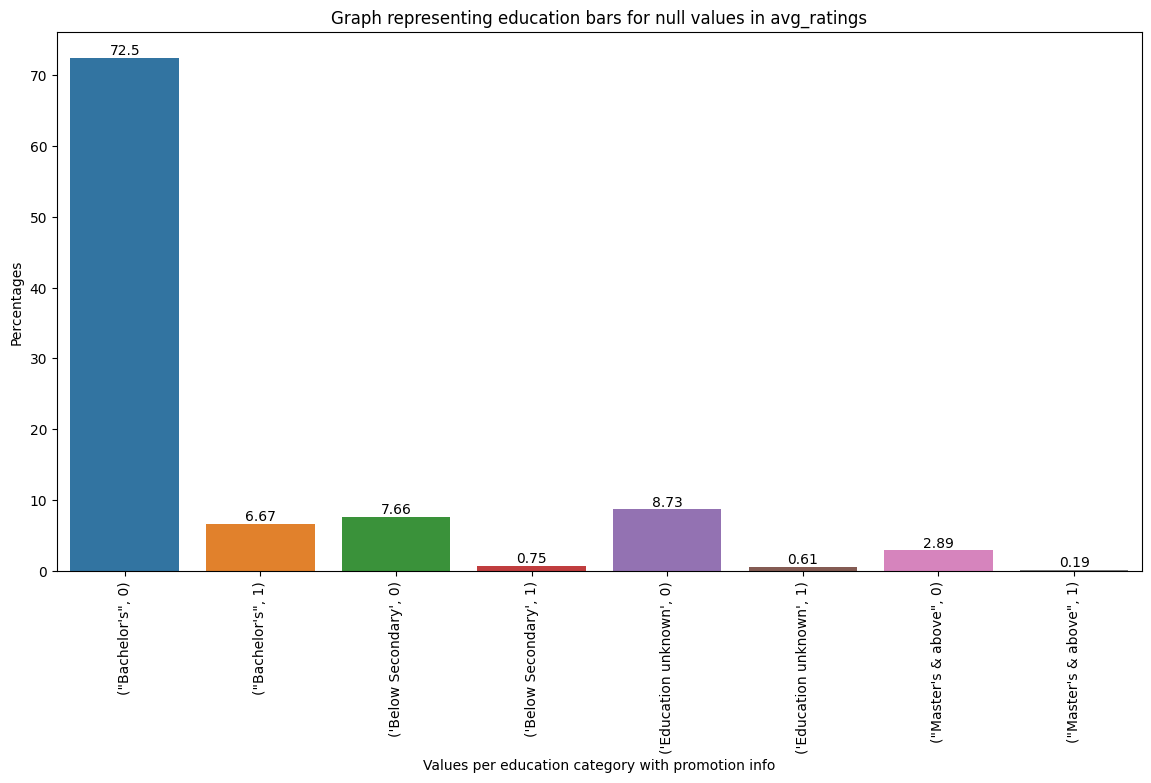

In [43]:

plt.figure(figsize = [14,7])

plt.title('Graph representing education bars for null values in avg_ratings')

ax = sns.barplot(x = previous_year_rates_bars_index , y = previous_year_rates_bars_values ) 

plt.bar_label(container = ax.containers[0] , labels = previous_year_rates_bars_values)

plt.xticks(rotation = 90)

plt.xlabel('Values per education category with promotion info') 

plt.ylabel('Percentages') 


### In this graph we have seen that share of the education unknown is so less in getting promotions . Now we have concluded that we can also delete the data of the education unknown category of the employee education. 

### They are good in quantity but the tragedy is that their promotions is very less in the number . 

### Rate for getting the promotions for Bachelor's is hghest 
### This MNC prefers to higher the Bachelor's mostly . 

#### I am not going to remove these null values ,  they are freshers employees mostly . If I get any new insight to impute the null values then I am going to impute those values otherwise not. 

#### Analysing for the duplicates our

In [44]:
print('Before dropping duplicates : ' , df.shape ) 

df.drop_duplicates(inplace = True) 

print('After dropping duplicates : ' , df.shape ) 


Before dropping duplicates :  (54808, 14)
After dropping duplicates :  (54808, 14)


### Here , there are 0 duplicate rows 

## Checking for outliers 

In [45]:
df.describe() 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Now , we analyze the outliers for numerical values
Boxplot 1


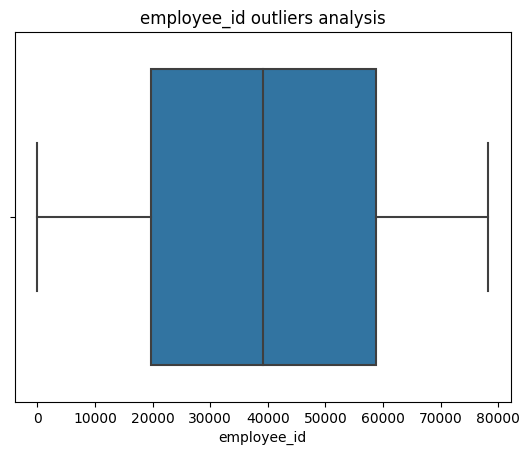

Boxplot 2


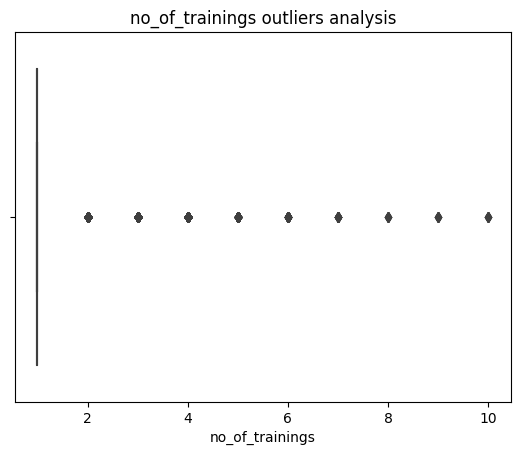

Boxplot 3


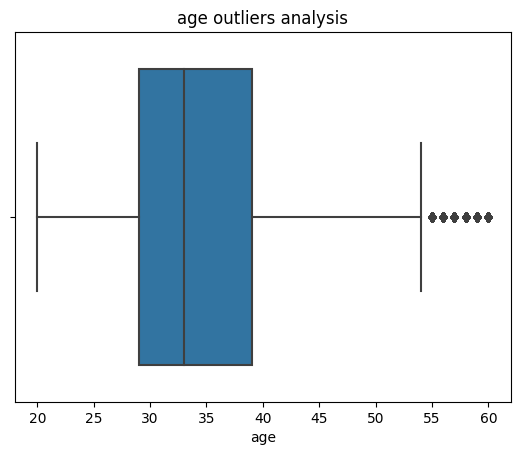

Boxplot 4


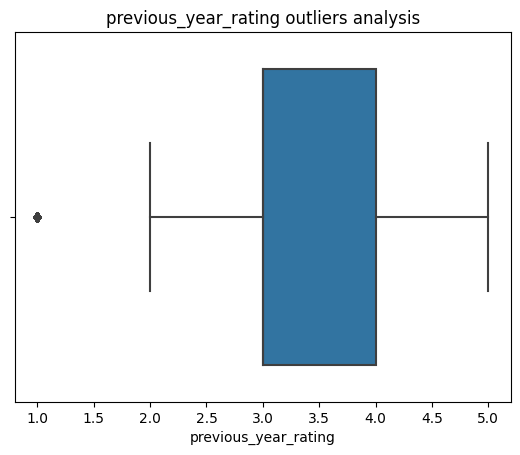

Boxplot 5


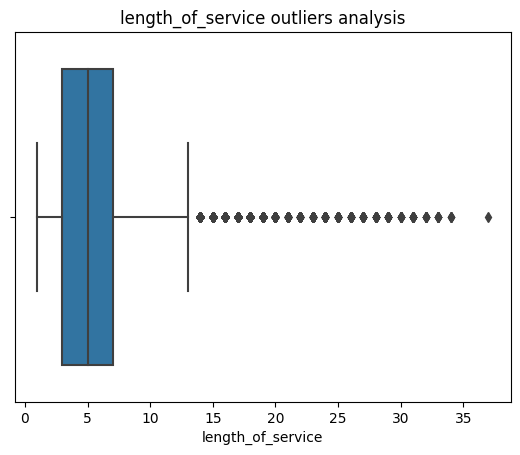

Boxplot 6


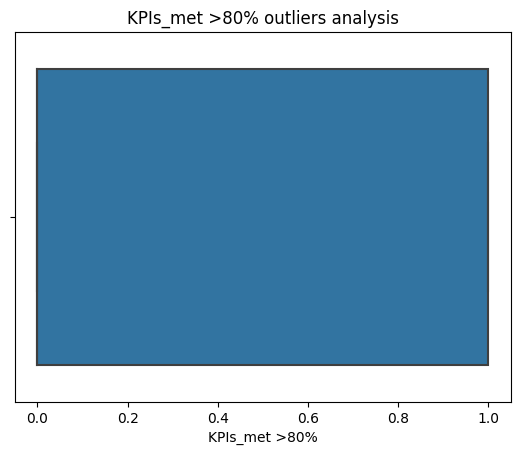

Boxplot 7


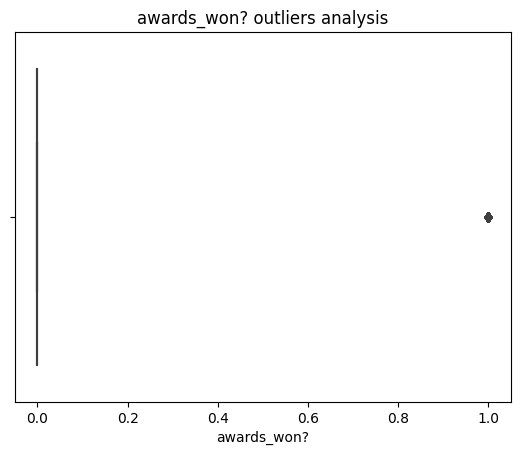

Boxplot 8


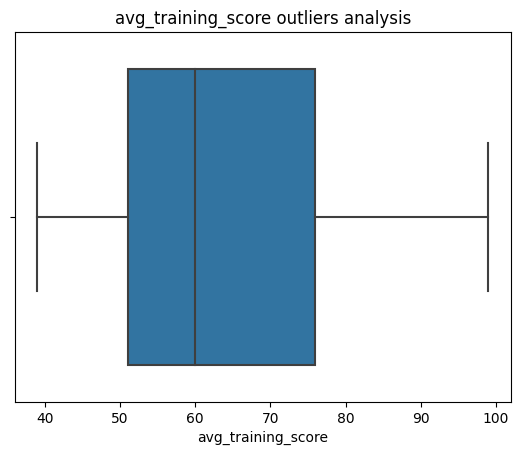

Boxplot 9


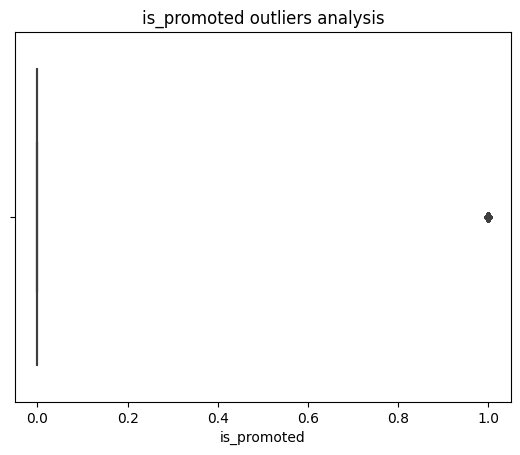

In [46]:

print('Now , we analyze the outliers for numerical values')

count = 0 

for i in df.columns:
    
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        
        count += 1
        
        print(f'Boxplot {count}')
        
        plt.title(f'{i} outliers analysis')
        
        sns.boxplot( x = df[i] )
        
        plt.show()

## Results of the above boxplots 
### 1) <u>BOXPLOT 2 : </u>  is showing lot of outliers but ,  we know that number of trainings done by 75% of employee is only 1 , So that is a reason why this boxplot is showing outliers after 1. 
### 2) <u>BOXPLOT 3 : </u> is showing outliers for the age of above 55 , they are very less in counts with them we can also get the insights is in the promotion there is factor of age or not we are not capping those values. 
### 3) <u>BOXPLOT 4 : </u> in this Boxplot it is showing the outliers because there very less number of employees as we know who have less than 1 year of experience that's why it is showing us outliers . 
### 4) <u>BOXPLOT 5 : </u> in this Boxplot it is showing outliers as we all know that in any company there are very people will work for 20 to 30 years , that is the reason why it is showing us outliers in lenght_of_service attribute. Another reason for it can be employees keep switching to different companies , and MNC prefers more to hire Bachelors's and freshers more. 
### 5) <u>BOXPLOT 6 : </u> in this Boxplot it is not showing any outliers because there are 75% of values are 1 for the attribute KPIs_met <80% and maximum values of this attribute is also 1 , so this is the reason why it is showing no outliers .
### 6) <u>BOXPLOT 7 : </u> in this Boxplot it is showing us outliers because there are only 2 values in it 0 and 1 out of which 75% of values of the attribute awards_on is 0 and it's maximum value is 1  , if the value is 1 then employee has won awards , if 0 then no awards were won by employee. 
### 7) <u>BOXPLOT 8 : </u> in this Boxplot there are no outliers for attripute avg_training_score , in which there scores are represented calculated on the basis of their performances during training. 
### 8) <u>BOXPLOT 9 : </u> in this Boxplot it is showing us outliers because in any company there is very small percentage of employees promoted hardly 5% to 6% and this attribute is representing us the employee who are promoted or not with the 0 and 1 . 1 if employee is promoted and 0 is employee is not promoted.

## Step 3 :
### Bivariate Analysis 

In [48]:
dff_categories = df  

### Now , I am going to do Bivariate analysis for that I have assign the data into another value and I am imputing the numerical values in the place of catrgorical values .

In [49]:
for i in dff_categories:
    if dff_categories[i].dtype == 'object':
        print(i)

department
region
education
gender
recruitment_channel


In [49]:
dff_categories['department'].unique()  

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [50]:
def func_categorize(parms_2):
    for i in parms_2:
        if parms_2[i].dtype == 'object':
            count = 0 
            for j in parms_2[i].unique():
                count += 1
                parms_2.loc[ parms_2[i] == j , i ] = count  
                


In [51]:
func_categorize(dff_categories)  

### Function has run successfully ! 


## We can check the correlations with the respect to the target value (is_promoted)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [53]:
corr_1 = dff_categories[['department','is_promoted']].corr()

<Axes: >

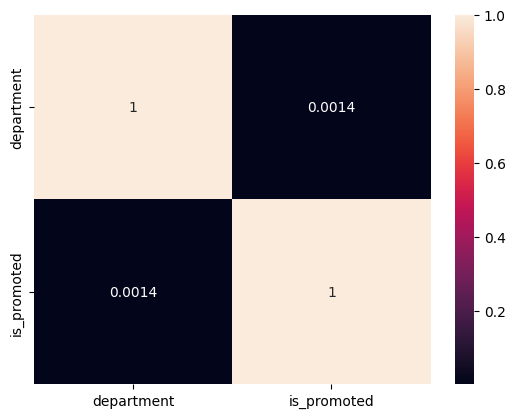

In [54]:
sns.heatmap(corr_1 , annot = True )

<Axes: >

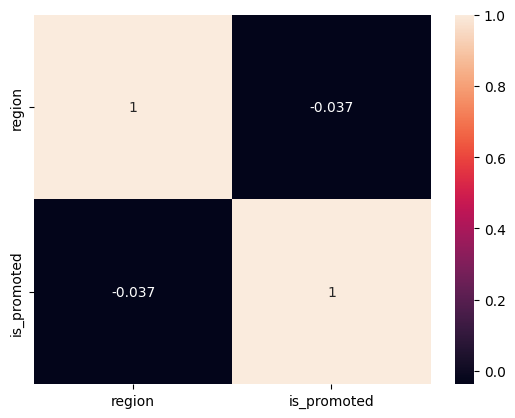

In [55]:
corr_2 = dff_categories[['region','is_promoted']].corr() 

sns.heatmap(corr_2 ,  annot = True) 

<Axes: >

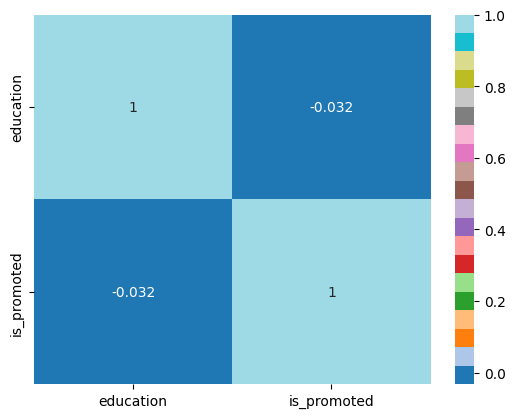

In [56]:
corr_3 = dff_categories[['education','is_promoted']].corr() 

sns.heatmap(corr_3 , annot = True , cmap = 'tab20')

<Axes: >

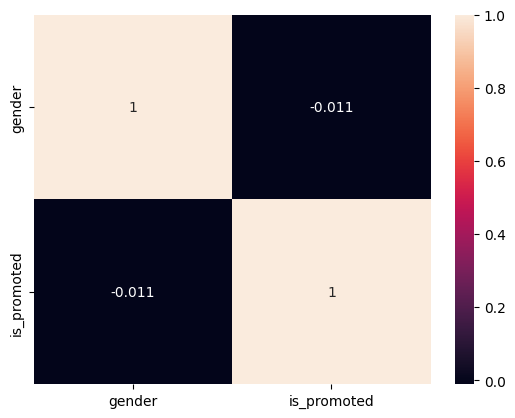

In [57]:
corr_4 = dff_categories[['gender','is_promoted']].corr() 

sns.heatmap(corr_4 , annot = True )

<Axes: >

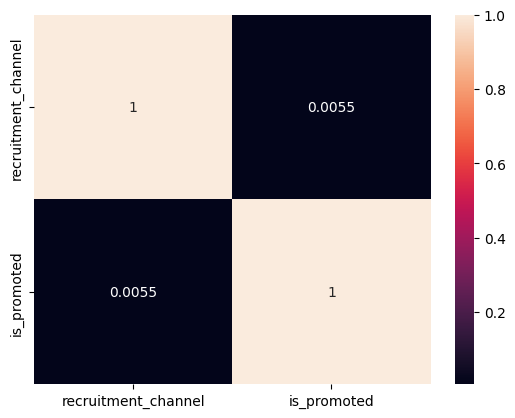

In [58]:
corr_4 = dff_categories[['recruitment_channel' , 'is_promoted']].corr() 

sns.heatmap(corr_4 , annot = True) 


<Axes: >

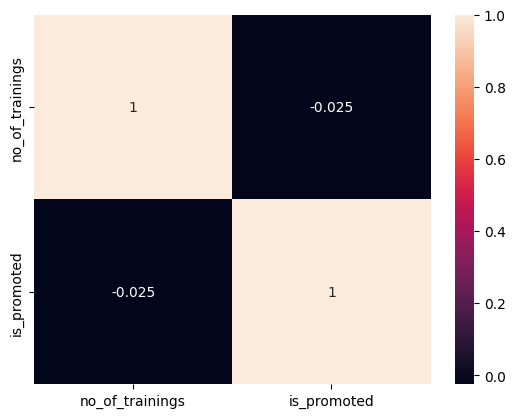

In [59]:

corr_5 = dff_categories[['no_of_trainings','is_promoted']].corr() 

sns.heatmap( corr_5 , annot = True )

<Axes: >

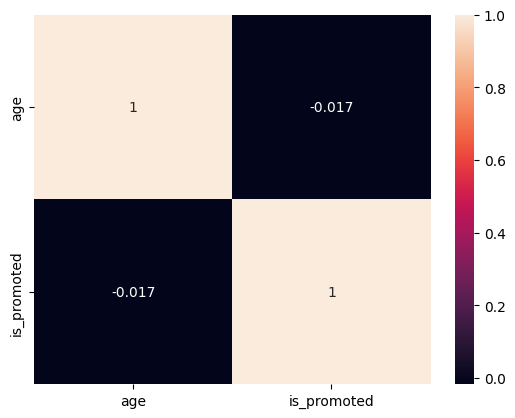

In [60]:

corr_6 = dff_categories[['age','is_promoted']].corr() 

sns.heatmap( corr_6 , annot = True )

<Axes: >

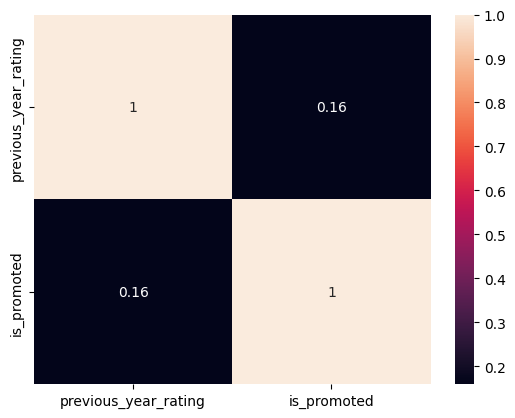

In [61]:

corr_7 = dff_categories[['previous_year_rating','is_promoted']].corr() 

sns.heatmap( corr_7 , annot = True )

<Axes: >

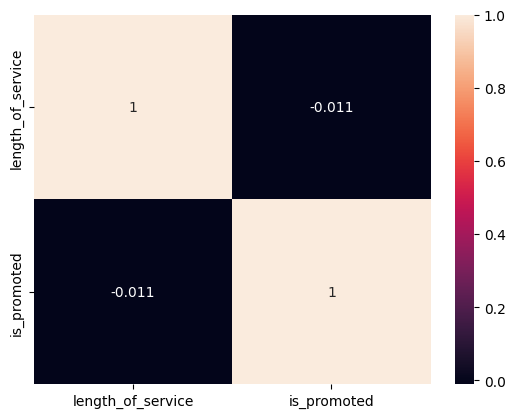

In [62]:

corr_8 = dff_categories[['length_of_service','is_promoted']].corr() 

sns.heatmap( corr_8 , annot = True )

<Axes: >

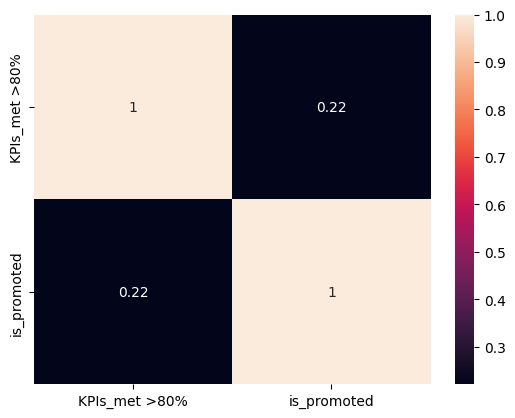

In [63]:

corr_9 = dff_categories[['KPIs_met >80%','is_promoted']].corr() 

sns.heatmap( corr_9 , annot = True )

<Axes: >

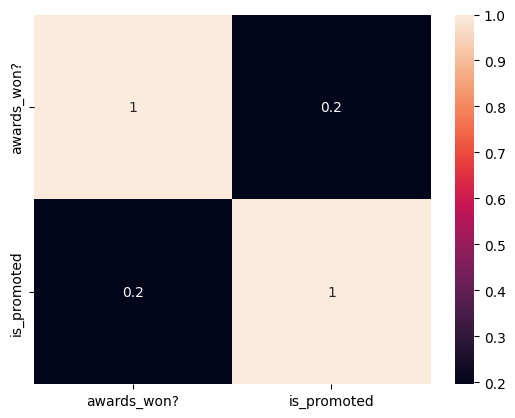

In [64]:

corr_10 = dff_categories[['awards_won?','is_promoted']].corr() 

sns.heatmap( corr_10 , annot = True )

<Axes: >

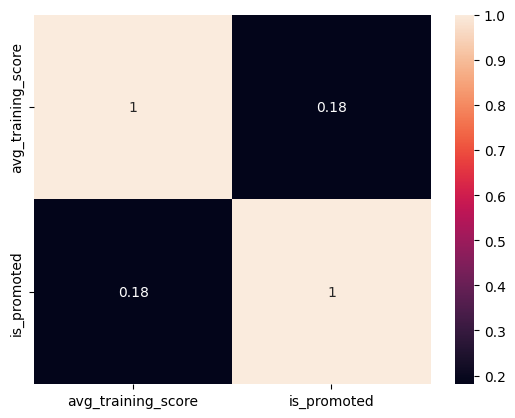

In [65]:

corr_11 = dff_categories[['avg_training_score','is_promoted']].corr() 

sns.heatmap( corr_11 , annot = True )

# Promotion is based upon these attributes if we go with these analysis .
### 1. Previous year rating 
### 2. KPIs_meet >80% 
### 3. awards_won 
### 4. avg_training_score

#### Coorelations  with the target_variable of above attributes is good but , not very great . But , for now  they are important we can move forward with those attributes and if another attributes required we can also go through with them.   

# Step 4 :
### Data Visuvalzations

### Writing the parameters on which MNC has decided to give promotions 
#### 1. They first identify a set of employees based on recommendations/ past performance 
#### 2.  Selected employees go through the separate training and evaluation program for each vertical. These programs are based on    the required skill of each vertical 
#### 3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

In [47]:
df.columns    

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [48]:
df.head() 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Steps followed by the MNC to identify the employees for promotion are :  

### Step 1 : Select the rows for the good performance and recommendations (but for it we don't have any relevant information)  

In [49]:
percentages = df.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count() / df.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count().sum() * 100

In [50]:
x_per_axis = [] 
y_per_axis = []

for i in percentages.index:
    x_per_axis.append(str(i)) 
     
for j in percentages.values:
    y_per_axis.append( round(float(j),3) ) 

print(x_per_axis)
print(y_per_axis)

["('other', 0)", "('other', 1)", "('referred', 0)", "('referred', 1)", "('sourcing', 0)", "('sourcing', 1)"]
[50.887, 4.664, 1.832, 0.252, 38.764, 3.602]


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "('other', 0)"),
  Text(1, 0, "('other', 1)"),
  Text(2, 0, "('referred', 0)"),
  Text(3, 0, "('referred', 1)"),
  Text(4, 0, "('sourcing', 0)"),
  Text(5, 0, "('sourcing', 1)")])

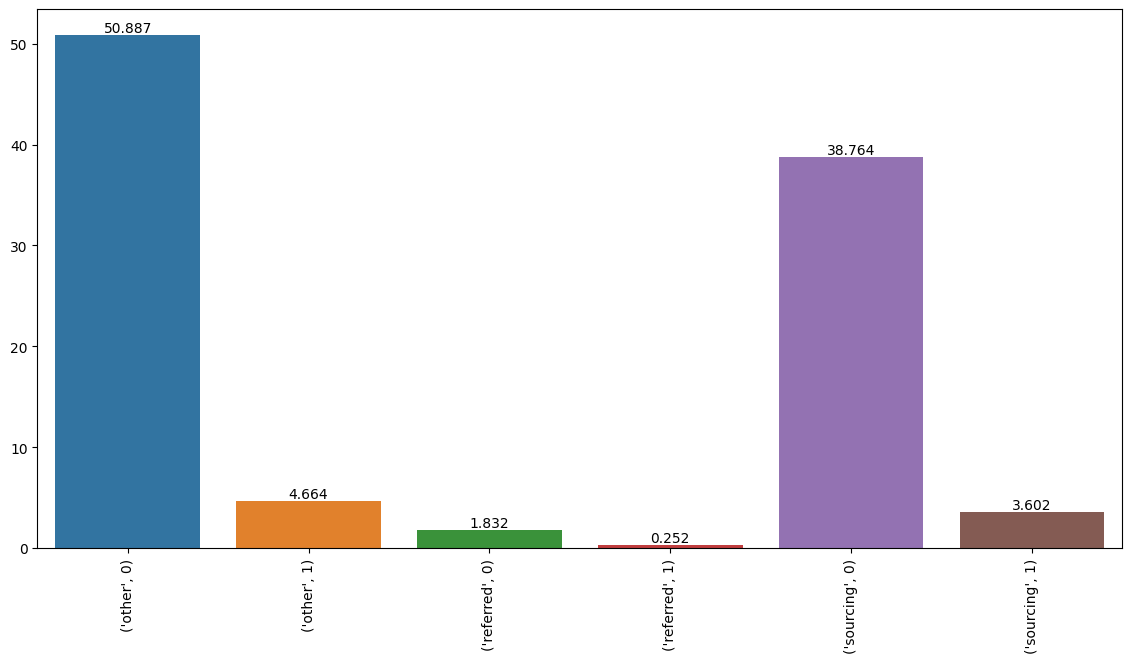

In [51]:
plt.figure(figsize = [14,7])

ax = sns.barplot(x = x_per_axis , y = y_per_axis)  

labels_values = y_per_axis 

ax.bar_label( container = ax.containers[0]  , labels = y_per_axis) 
 

plt.xticks( rotation = 90 )

## 1. After analyzing that graph we come to know that the company trusts more to the sourcing and referred employees 
## 2. Because here we seen that 55% of employees are from others source and only 5% of employees are promotted from them . 
## 3. From the Sourcing recruitment_channel about 42% of employees are recruited , and 3.6% of employees promoted . 
## Compare to Others and Sourcing recruitment_channels Sourcing is much better trusted by HRs and their records are also very good. 

<Axes: xlabel='recruitment_channel', ylabel='count'>

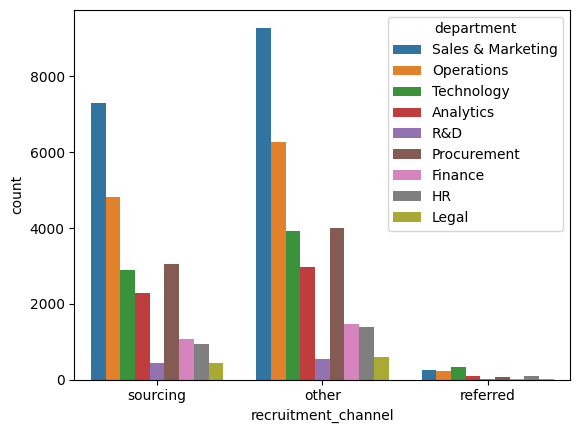

In [52]:
sns.countplot( x = df['recruitment_channel'] , hue = df['department'] )  

### Definately from this graph , we come to know that Sales & Marketing staff has came into the company throw both sourcing and other recruitment_channel ,  we know that from other cnannel maximum number of employees has entered into our company  
#### Top 3 Highest number of staff in MNC is of Sales & Marketing , Operations and Technology  
### One thing is notable here , is that from reffered recruitment_channel we have to promotions from there form 1.8% of employees 0.252% of employees are promoted . 
#### It is very little amount of data I am putting this reffered data into the Sourcing 

In [53]:
df.loc[df['recruitment_channel'] == 'referred' , 'recruitment_channel'] = 'sourcing'   

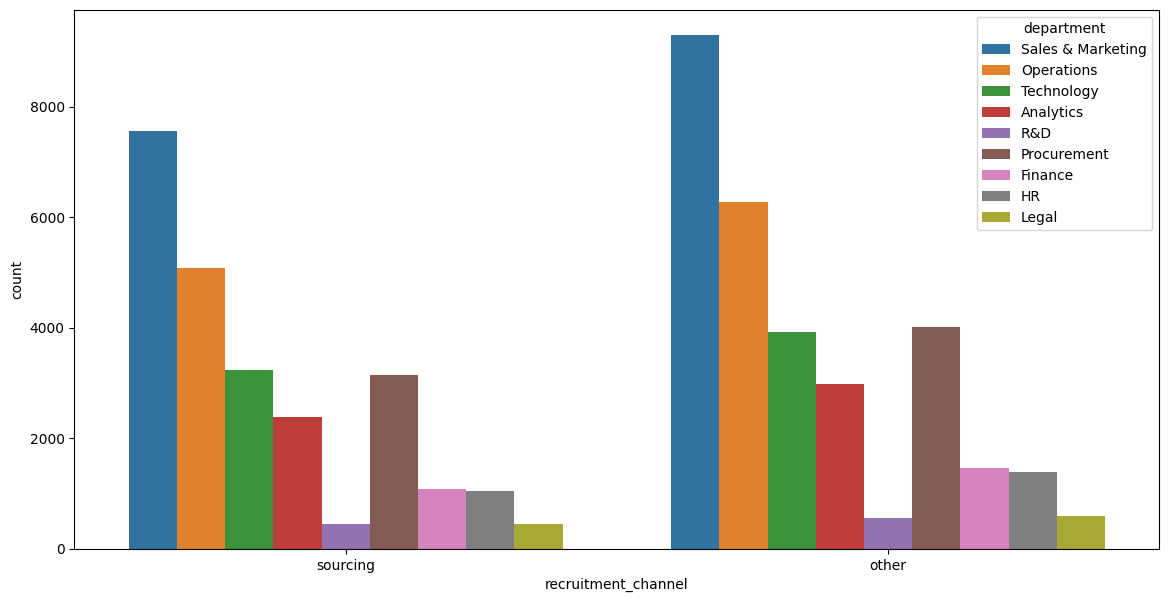

In [54]:
plt.figure(figsize = [14,7])

sns.countplot( x = df['recruitment_channel'] , hue = df['department']) 

plt.show()

#### As per contidition 1st we have to give the first priority to the employees came from sourcing channel.

In [55]:
recruitment_wise_promotion = df.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count() / df.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count().sum() * 100 

In [56]:
x_axis_promotion  = []
y_axis_promotion = [] 

for i in recruitment_wise_promotion.index:
    x_axis_promotion.append(str(i))
    
for j in recruitment_wise_promotion.values:
    y_axis_promotion.append( round(float(j),2) )

[Text(0, 0, '50.89'),
 Text(0, 0, '4.66'),
 Text(0, 0, '40.6'),
 Text(0, 0, '3.85')]

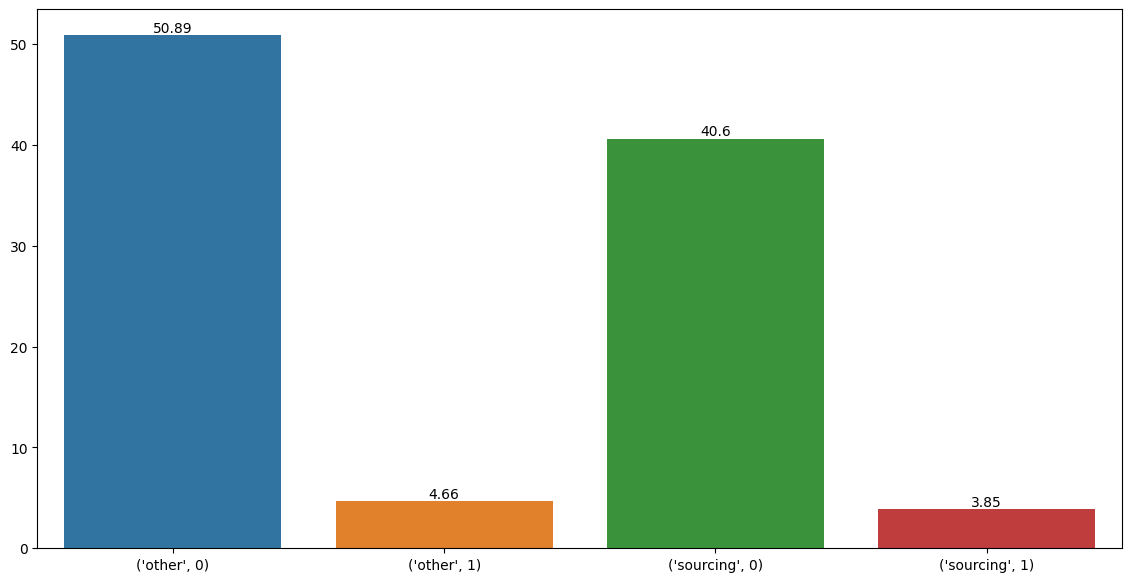

In [57]:
plt.figure(figsize = [14,7]) 

ax = sns.barplot(x = x_axis_promotion , y = y_axis_promotion )  

ax.bar_label( container = ax.containers[0] , label = y_axis_promotion ) 

<Axes: xlabel='recruitment_channel', ylabel='awards_won?'>

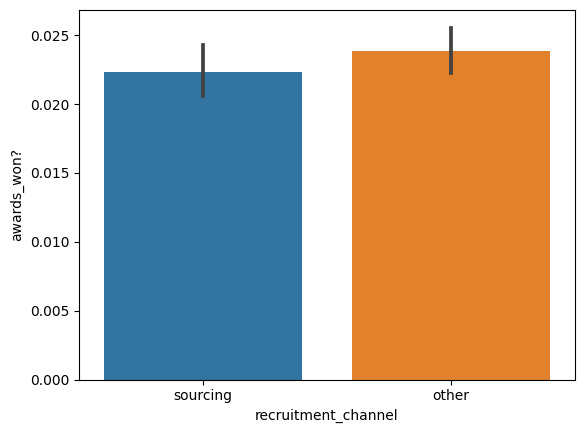

In [58]:
sns.barplot(x = df['recruitment_channel'] , y = df['awards_won?'])  

### Analyse past performance

In [59]:
df.columns 

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### For analysing past perfromance awards_won and previous_year_rating is the most relevant column .

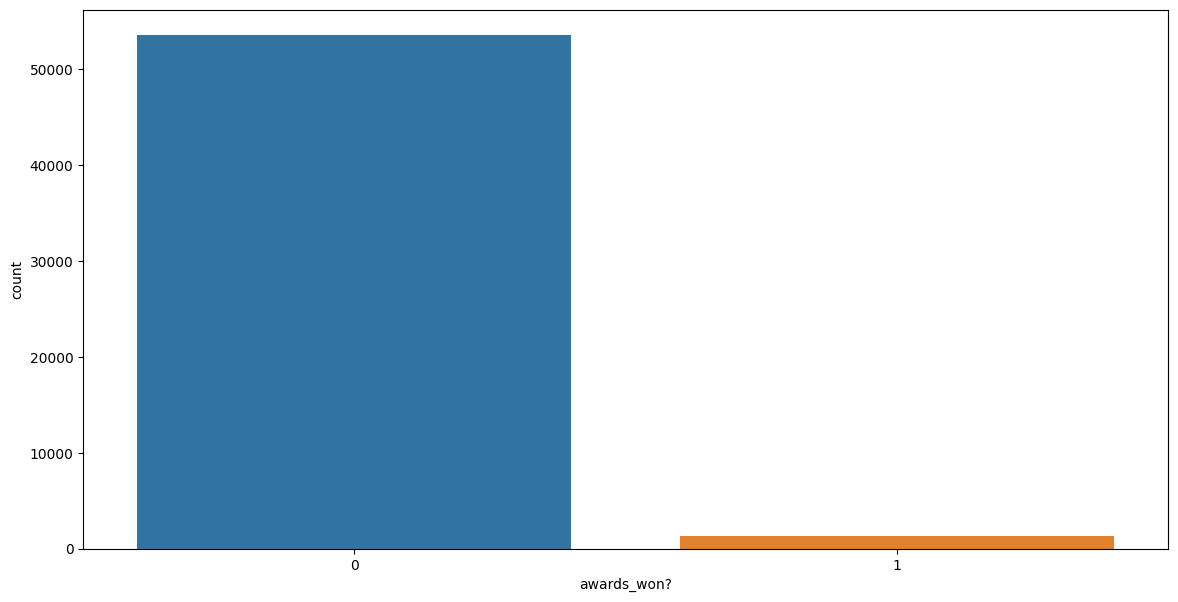

In [60]:
plt.figure(figsize = [14,7])

sns.countplot(x = df['awards_won?'] ) 

plt.show()

In [61]:
percentage_of_awards_won = df.groupby(['awards_won?'])['awards_won?'].count() / df.groupby(['awards_won?'])['awards_won?'].count().sum()  * 100 

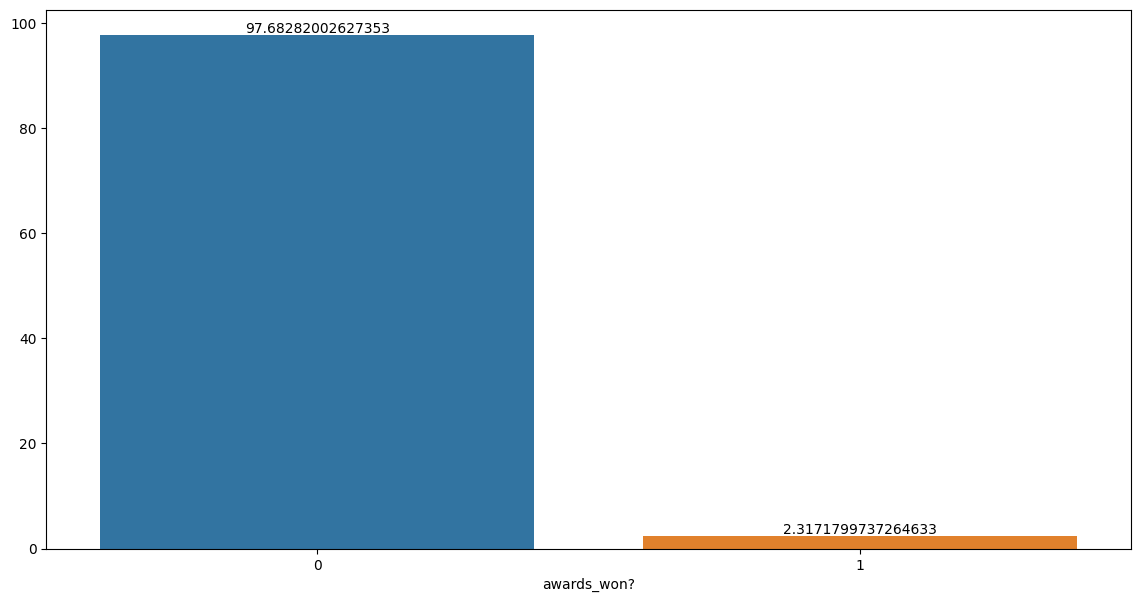

In [62]:
plt.figure(figsize = [14,7])

ax = sns.barplot(x = percentage_of_awards_won.index ,y =  percentage_of_awards_won.values)

ax.bar_label(container = ax.containers[0] , labels = percentage_of_awards_won.values) 

plt.show()

## Only 2.31% of employees won awards 

In [63]:
percentage_of_awards_won_promoted = df.groupby(['awards_won?','is_promoted'])['is_promoted'].count() / df.groupby(['awards_won?','is_promoted'])['is_promoted'].count().sum() * 100 

In [64]:
percentage_of_awards_won_promoted 

awards_won?  is_promoted
0            0              90.185739
             1               7.497081
1            0               1.297256
             1               1.019924
Name: is_promoted, dtype: float64

In [65]:
x_axis_per_promotions = []
y_axis_per_promotions = [] 


for i in percentage_of_awards_won_promoted.index:
    x_axis_per_promotions.append(str(i))
    
for j in percentage_of_awards_won_promoted.values:
    y_axis_per_promotions.append( round(float(j),4) )


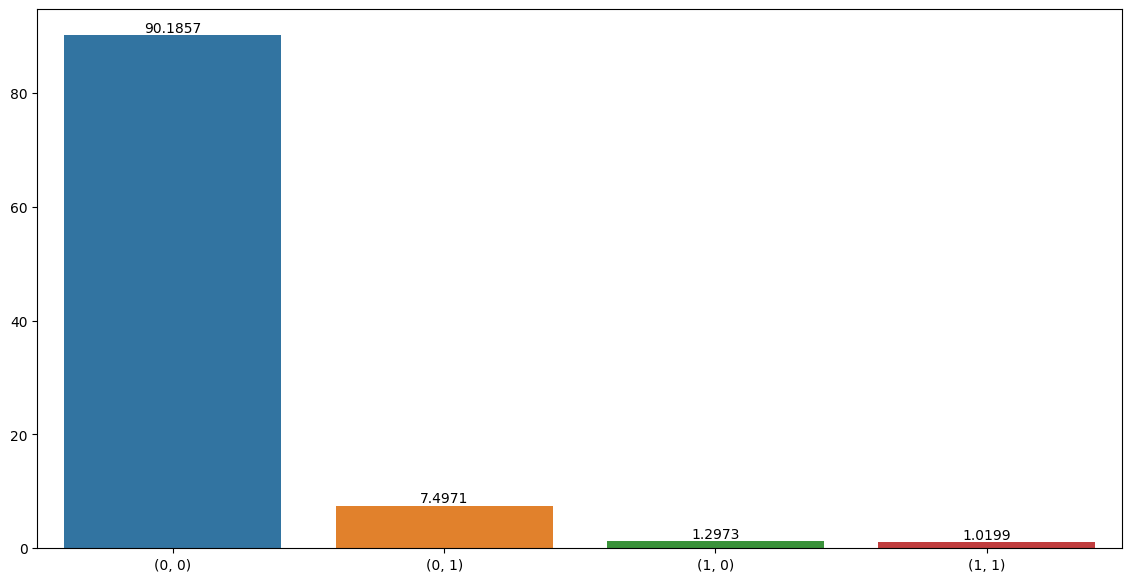

In [66]:
plt.figure(figsize = [14,7])

ax = sns.barplot(x = x_axis_per_promotions ,y =  y_axis_per_promotions )

ax.bar_label(container = ax.containers[0] , labels = y_axis_per_promotions  ) 

# plt.xticks('awards_won_or_not_&_promotions')

# plt.yticks('awards_won_percentages')

plt.show()

### We have derived here , that approximately half of the employees ( about 1.2972% out of 2.317% of all promoted employees ) are promoted here who got the awards . 

### Now, we analyze the previous_year_rating for past performances. 

<Axes: xlabel='previous_year_rating', ylabel='count'>

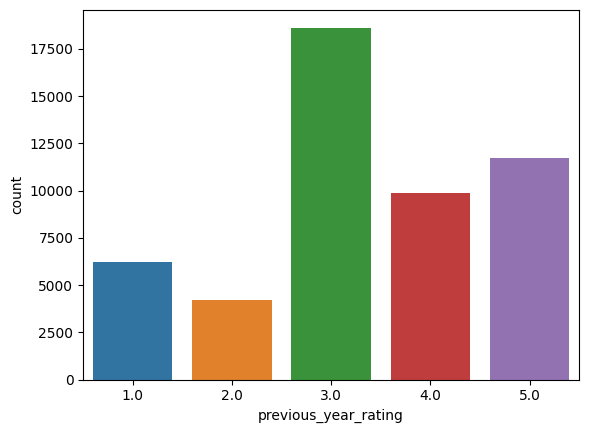

In [67]:

sns.countplot(x = df['previous_year_rating']) 


In [68]:
df.groupby(['previous_year_rating'])['previous_year_rating'].count() / df.groupby(['previous_year_rating'])['previous_year_rating'].count().sum() * 100 

previous_year_rating
1.0    12.278036
2.0     8.335964
3.0    36.733486
4.0    19.487412
5.0    23.165101
Name: previous_year_rating, dtype: float64

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

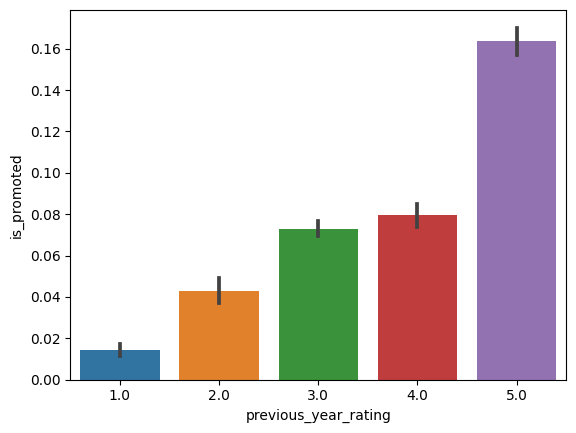

In [69]:
sns.barplot(x = df['previous_year_rating'] , y = df['is_promoted']) 

previous_year_rating
1.0    12.278036
2.0     8.335964
3.0    36.733486
4.0    19.487412
5.0    23.165101
Name: previous_year_rating, dtype: float64


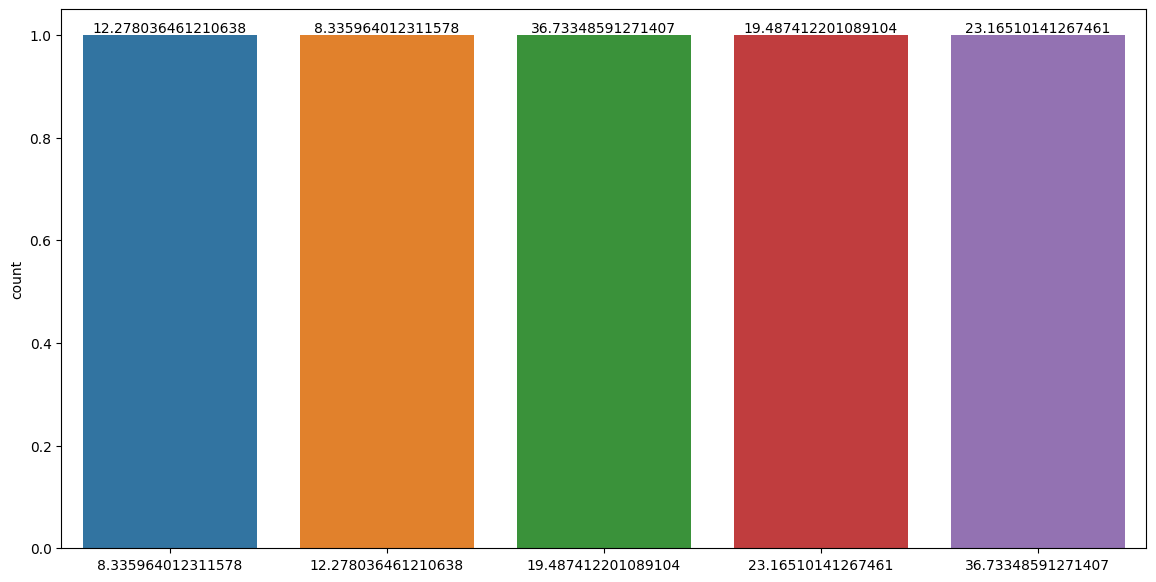

In [70]:
plt.figure(figsize = [14,7])

ratings_previous_year = df.groupby(['previous_year_rating'])['previous_year_rating'].count() / df.groupby(['previous_year_rating'])['previous_year_rating'].count().sum() * 100 

print(ratings_previous_year) 

ax = sns.countplot( x = ratings_previous_year.values   ) 

ax.bar_label( container = ax.containers[0]  , labels = ratings_previous_year.values ) 

plt.show()


In [71]:
previous_year_ratings =  df.groupby(['previous_year_rating','is_promoted'])['is_promoted'].count() / df.groupby(['previous_year_rating','is_promoted'])['is_promoted'].count().sum() * 100

In [72]:

x_list_index = [] 

y_list_index = [] 

 
for i in previous_year_ratings.index:
    x_list_index.append(str(i)) 
    

for j in previous_year_ratings.values:
    y_list_index.append( round(float(j),2) )


    

[Text(0, 0, '12.1'),
 Text(0, 0, '0.17'),
 Text(0, 0, '7.98'),
 Text(0, 0, '0.36'),
 Text(0, 0, '34.06'),
 Text(0, 0, '2.67'),
 Text(0, 0, '17.94'),
 Text(0, 0, '1.55'),
 Text(0, 0, '19.37'),
 Text(0, 0, '3.79')]

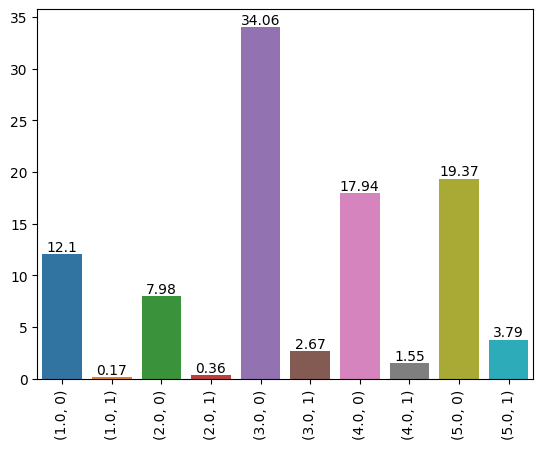

In [73]:

ax = sns.barplot( x = x_list_index , y = y_list_index )   

plt.xticks(rotation = 90)  

ax.bar_label( container = ax.containers[0] , labels = y_list_index ) 


### Here it is showing me 3.0 rating for maximum number of employees. Ratings with 5.0 are mostly promoted for promotions in the MNC .  

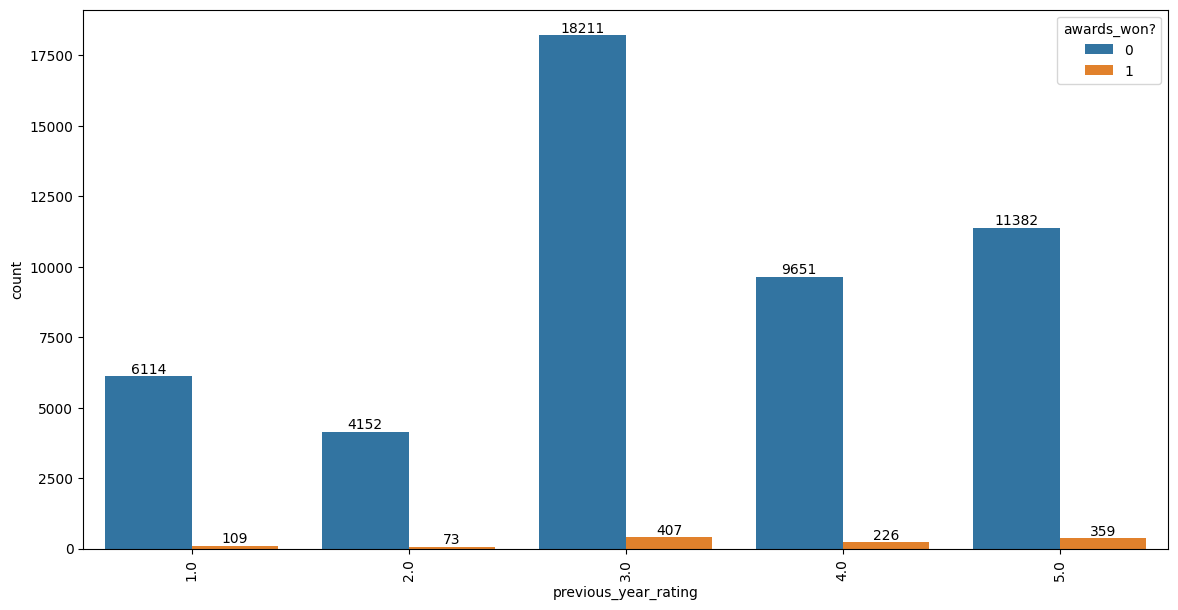

In [74]:

plt.figure(figsize = [14,7])

ax = sns.countplot(x = df['previous_year_rating'] ,  
                  hue = df['awards_won?']) 

label_values = df.groupby(['previous_year_rating','awards_won?'])['awards_won?'].count() 

ax.bar_label( container = ax.containers[0] , labels = label_values[0::2].values )  

ax.bar_label( container = ax.containers[1] , labels = label_values[1::2].values ) 

plt.xticks(rotation = 90)


plt.show()


### In this graph we have seen that employees with the rating of 5.0 have promoted most and also won most number of awards here in the company it is the reason why they got most highest percentage of promotions in the company 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

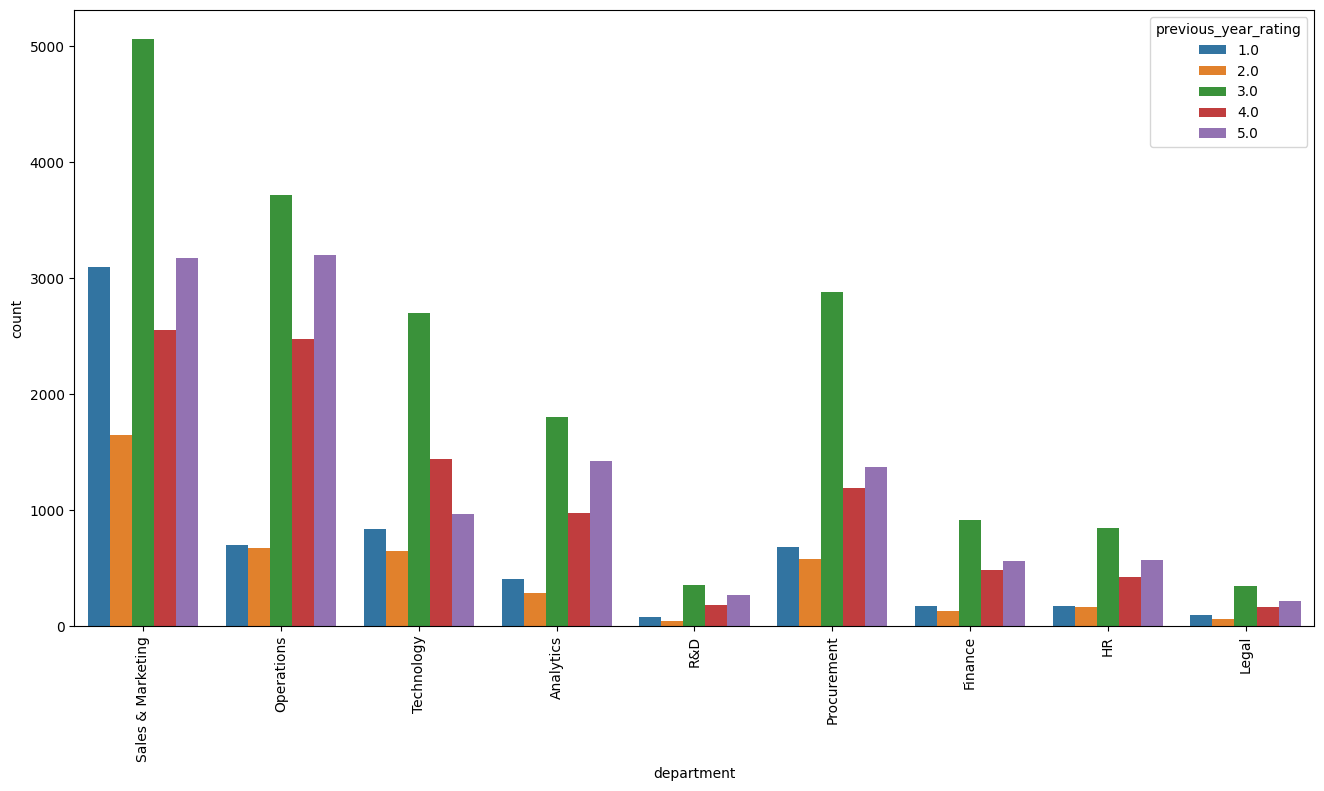

In [75]:
plt.figure(figsize = [16,8])

sns.countplot( x = df['department'] , hue = df['previous_year_rating'] ) 

plt.xticks(rotation = 90) 


### From this graph we cannot derive any insight as we know that , Sales & Marketung employees are in bulk , but in this graph we come to known that average rating with 5.0 has promoted mostly.

### Now, we are going to analyze the KPIs_met >80% and avg_training_score.

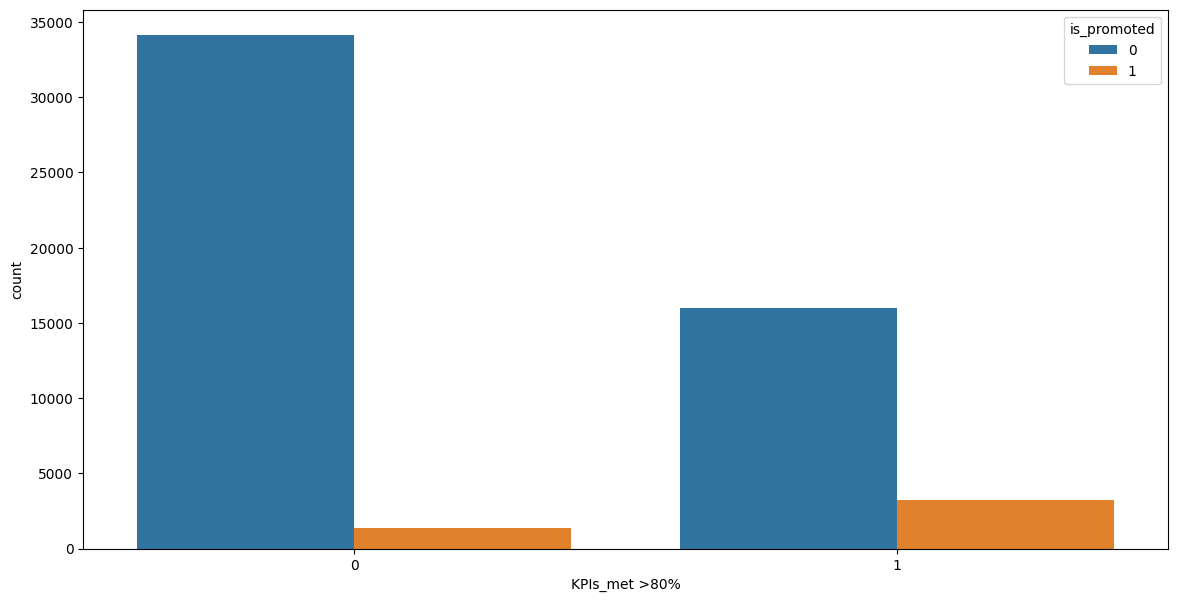

In [76]:
plt.figure( figsize = [14,7])

sns.countplot( x = df['KPIs_met >80%']  , hue = df['is_promoted']) 

plt.show()

### I am dividing the avg_training_scores into 4 sections percentage wise 
#### avg_training_scores >= 0 to avg_training_scores <= 20 as 'E' 
#### avg_training_scores > 20 to avg_training_scores <= 40 as 'D' 
#### avg_training_scores > 41 to avg_training_scores <= 59 as 'C'
#### avg_training_scores >= 60  to avg_training_scores <= 80 as 'B' 
#### avg_training_scores >= 81  to avg_training_scores <= 100 as 'A'  

In [77]:
df.columns 

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [78]:
 df['new_avg_training_score'] = 0 

In [79]:
df.columns 

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'new_avg_training_score'],
      dtype='object')

In [80]:

df.loc[ (df['avg_training_score'] >= 0.0) & (df['avg_training_score'] <= 59.0) , 'new_avg_training_score'] = 'Below_60%'  

df.loc[ (df['avg_training_score'] >= 60.0) & (df['avg_training_score'] <= 100.0) , 'new_avg_training_score'] = 'Above_60%' 


In [81]:
df.new_avg_training_score.unique()

array(['Below_60%', 'Above_60%'], dtype=object)

In [82]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new_avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Below_60%
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Above_60%
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Below_60%
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Below_60%
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Above_60%
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0,Above_60%
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0,Below_60%
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0,Above_60%
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0,Above_60%
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0,Below_60%


[Text(0, 0, '52.802510582396735'), Text(0, 0, '47.19748941760327')]

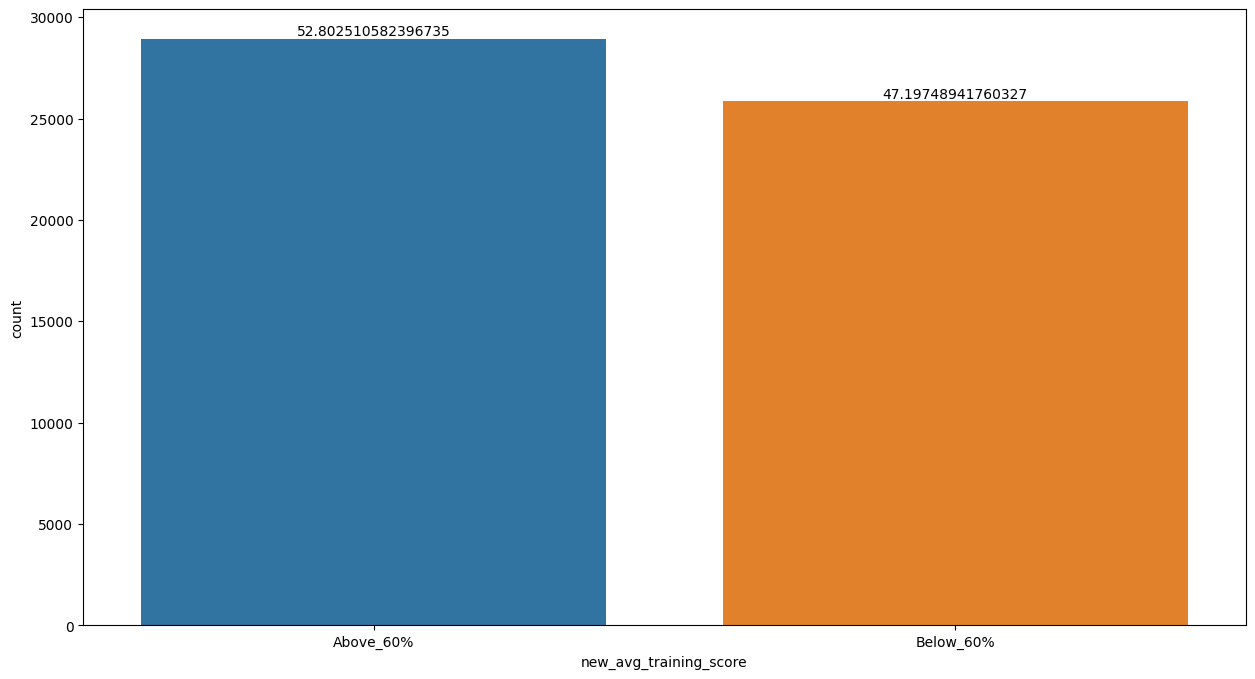

In [83]:
plt.figure(figsize = [15,8])

ax = sns.countplot(x = df['new_avg_training_score'] , 
                 order = df['new_avg_training_score'].value_counts(ascending = False).index ) 

label_values = (df.groupby(['new_avg_training_score'])['new_avg_training_score'].count() / df.groupby(['new_avg_training_score'])['new_avg_training_score'].count().sum()) * 100 

ax.bar_label( container = ax.containers[0] , labels = label_values.values )  



[Text(0, 0, '6.3001751569114'), Text(0, 0, '2.216829659903664')]

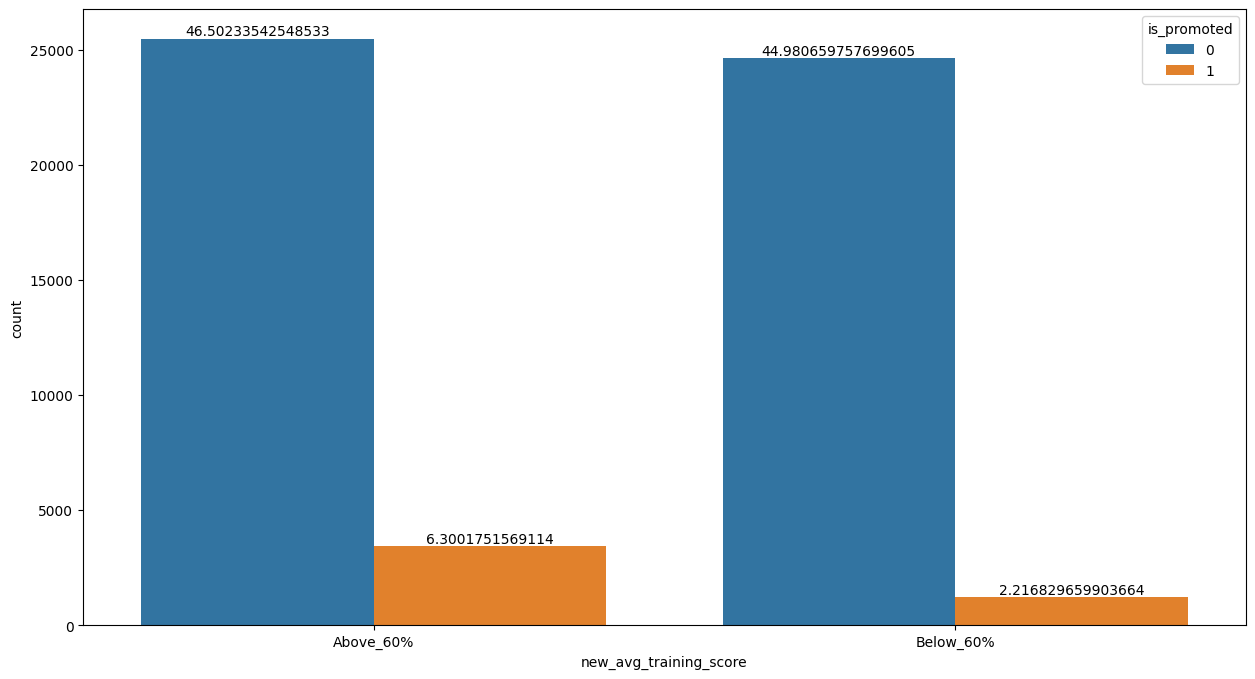

In [84]:

plt.figure(figsize = [15,8])

ax = sns.countplot(x = df['new_avg_training_score'] , 
                 order = df['new_avg_training_score'].value_counts(ascending = False).index , 
                  hue = df['is_promoted']) 

label_values = (df.groupby(['new_avg_training_score','is_promoted'])['is_promoted'].count() / df.groupby(['new_avg_training_score','is_promoted'])['is_promoted'].count().sum()) * 100 

ax.bar_label( container = ax.containers[0] , labels = label_values[0::2].values )  

ax.bar_label( container = ax.containers[1] , labels = label_values[1::2].values ) 


### Emloyees with above 60% of avg_training_score has been selected about 6% from overall employees. 

### This graph is one of the main deciding factors in deciding promotions of the employees . As about 6% of the employees with the percentage more that 60% got selected in the company 

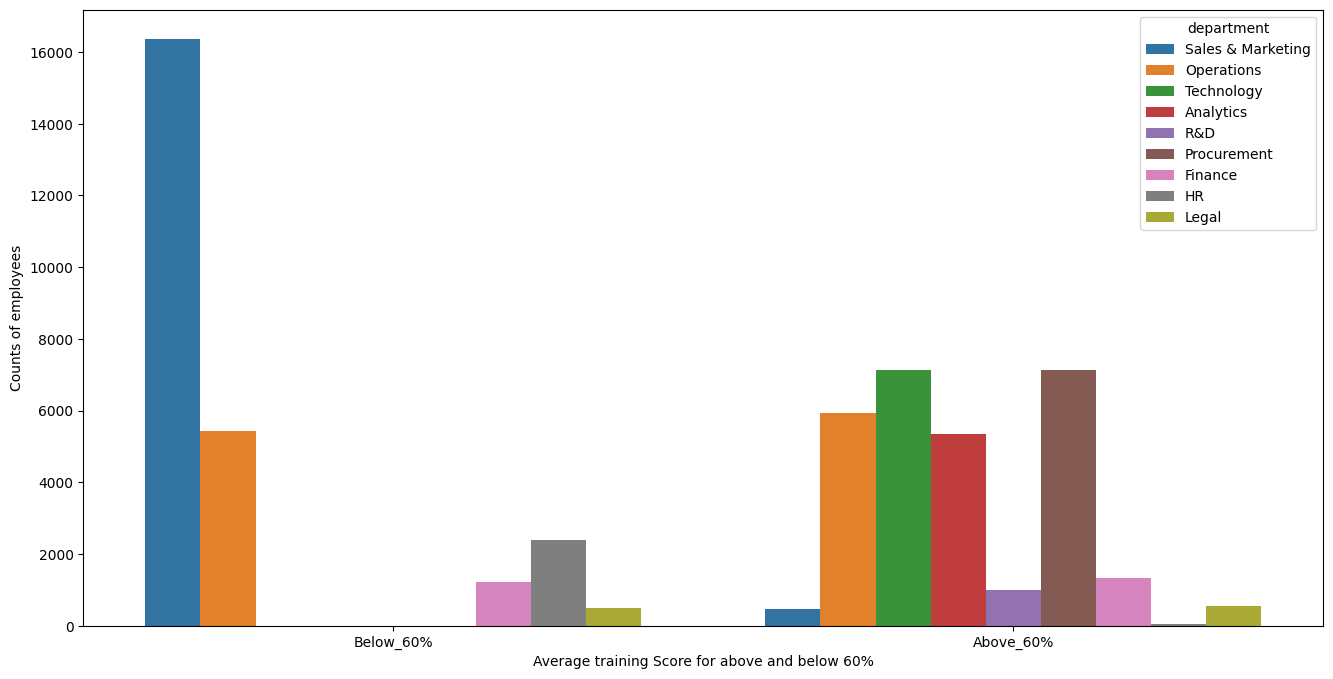

In [85]:
plt.figure(figsize = [16,8])

sns.countplot( x = df['new_avg_training_score']  ,  hue = df['department'] ) 

plt.xlabel('Average training Score for above and below 60%') 

plt.ylabel('Counts of employees')

plt.show()

#### Most of the employees belongs to Technology , Analytics , R&D ,  Procurement departments have scored above 60% marks  

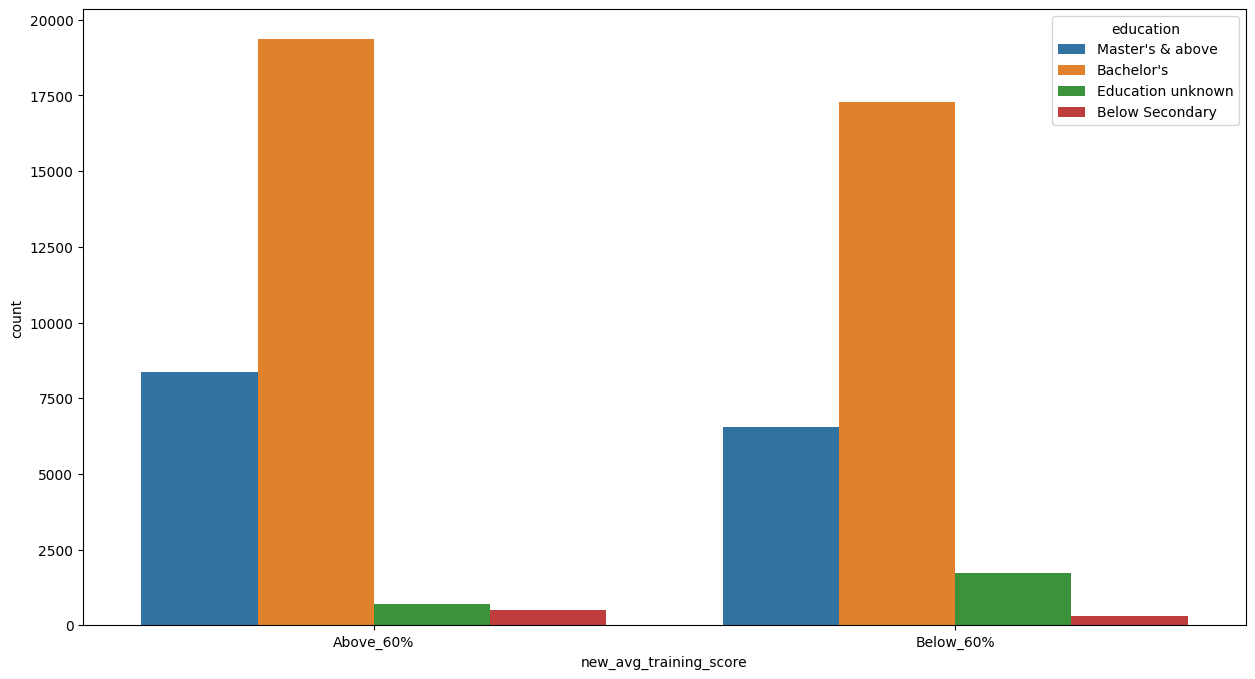

In [86]:
plt.figure(figsize = [15,8])

ax = sns.countplot(x = df['new_avg_training_score'] , 
                 order = df['new_avg_training_score'].value_counts(ascending = False).index , 
                 hue = df['education']) 

label_values = df.groupby(['new_avg_training_score','education'])['education'].count() / df.groupby(['new_avg_training_score','education'])['education'].count().sum() * 100 


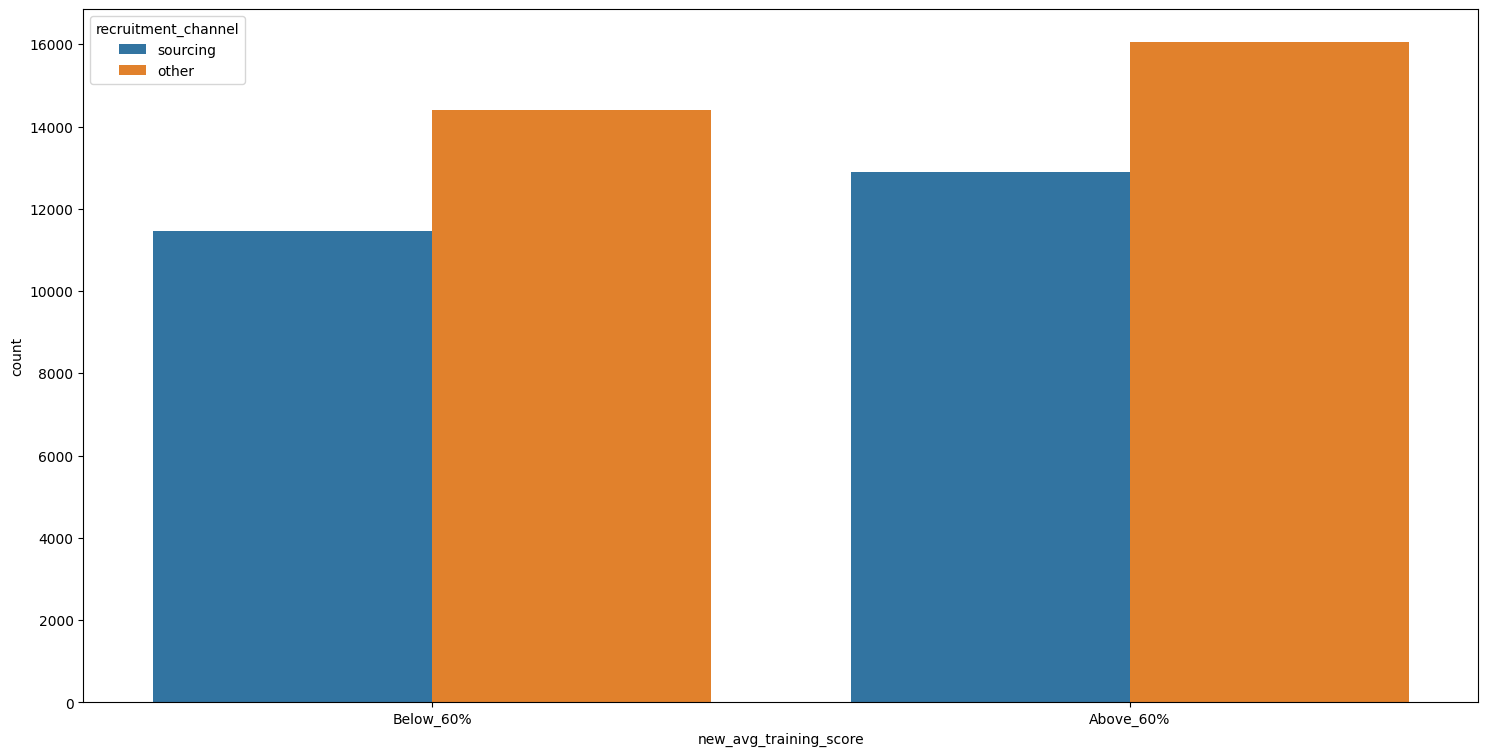

In [87]:
plt.figure(figsize = [18,9])

sns.countplot( x = df['new_avg_training_score']  , hue = df['recruitment_channel'] ) 

plt.show()

### Again it is proved that Employees coming through Sourcing channel are proven to be good and they their performance is also very great .

### Now , we are going to analyze the KPIs column 

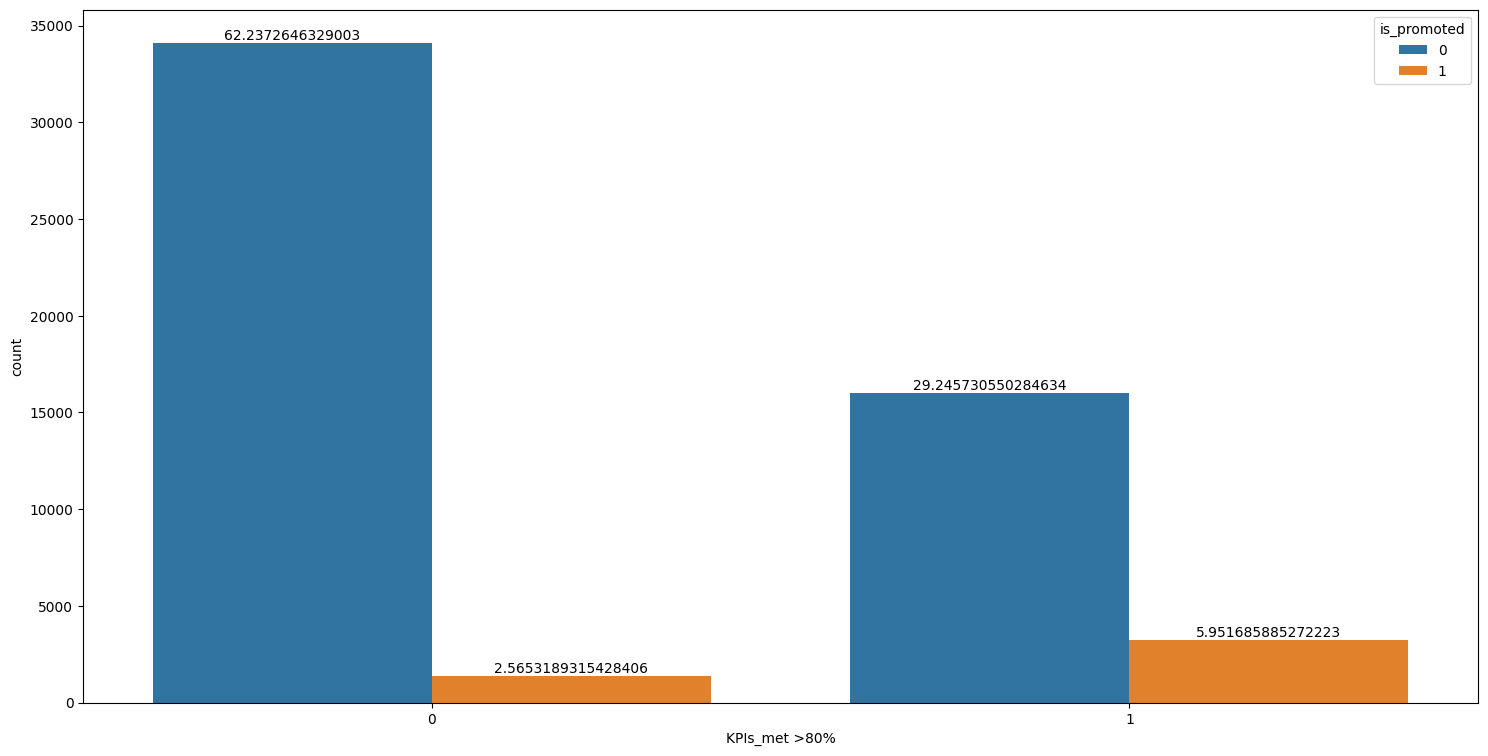

In [103]:

plt.figure( figsize = [18,9] )

ax = sns.countplot( x = df['KPIs_met >80%']   , hue = df['is_promoted'])  

label_values =  df.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count() / df.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count().sum() * 100

ax.bar_label( container = ax.containers[0] , labels = label_values[0::2].values )

ax.bar_label( container = ax.containers[1] , labels = label_values[1::2].values )

plt.show()


### KPIs_met >80%  is showing me percentage of people who got selected for the promotions are about 7% to 8% 
### From 35% of the total KPIs_met >80% about 6% of them are selected . 

(array([0, 1, 2, 3]),
 [Text(0, 0, "Master's & above"),
  Text(1, 0, "Bachelor's"),
  Text(2, 0, 'Education unknown'),
  Text(3, 0, 'Below Secondary')])

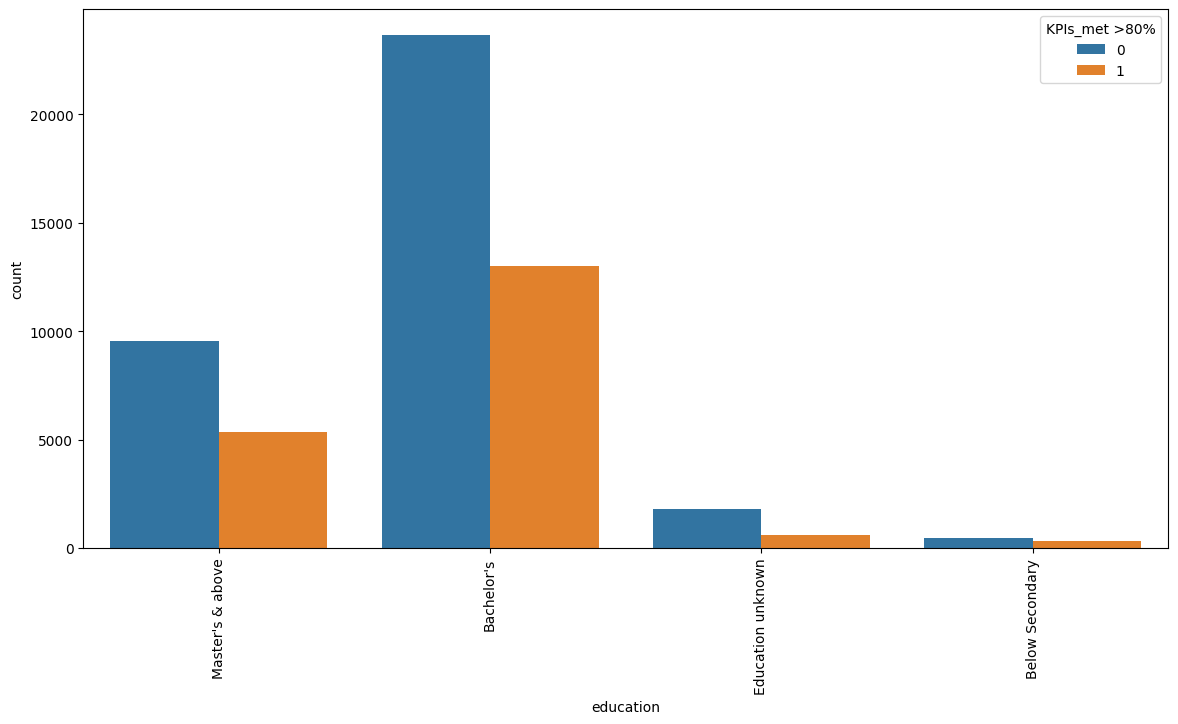

In [108]:

plt.figure( figsize = [14,7] )

sns.countplot( x = df['education']   , hue = df['KPIs_met >80%'])    

plt.xticks(rotation= 90)


### Bachelor's and Masters's & above type education are getting good marks in the KPIs rankings that is also a a reason why they get promoted 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

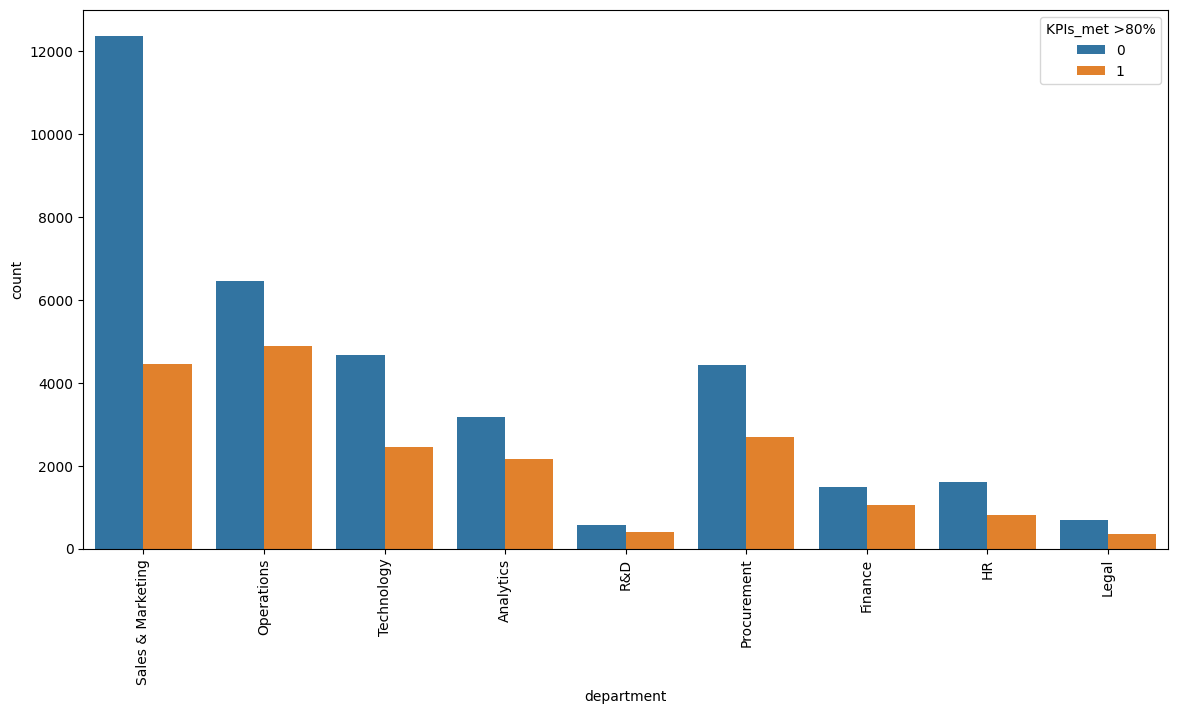

In [109]:

plt.figure( figsize = [14,7] )

sns.countplot( x = df['department']   , hue = df['KPIs_met >80%'])    

plt.xticks(rotation= 90)


### Operations , Technology , Analytics and Procurenment are the departments who are having good KPIs 

In [111]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'new_avg_training_score'],
      dtype='object')

<Axes: xlabel='length_of_service', ylabel='avg_training_score'>

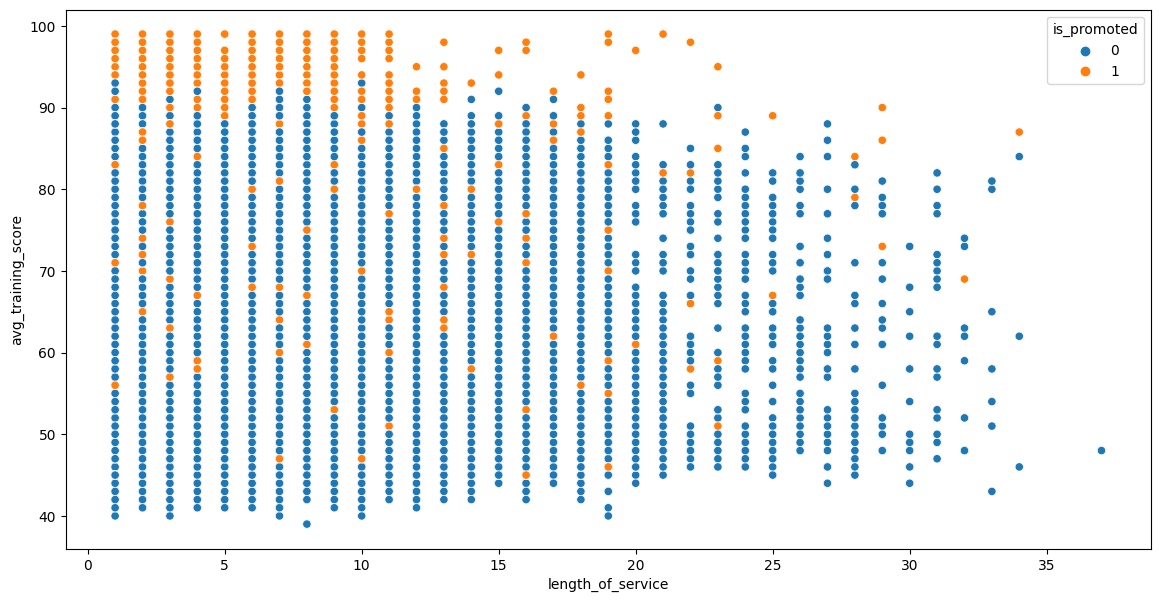

In [118]:
plt.figure(figsize = [14,7])

sns.scatterplot( x = df['length_of_service'] , y = df['avg_training_score'] , hue = df['is_promoted'] )

### In this graph we seen that above 60% of the avg_training_score are selected more , the employees with the lenght_of_service is less that 15 are selected more for promotions

<Axes: xlabel='length_of_service', ylabel='avg_training_score'>

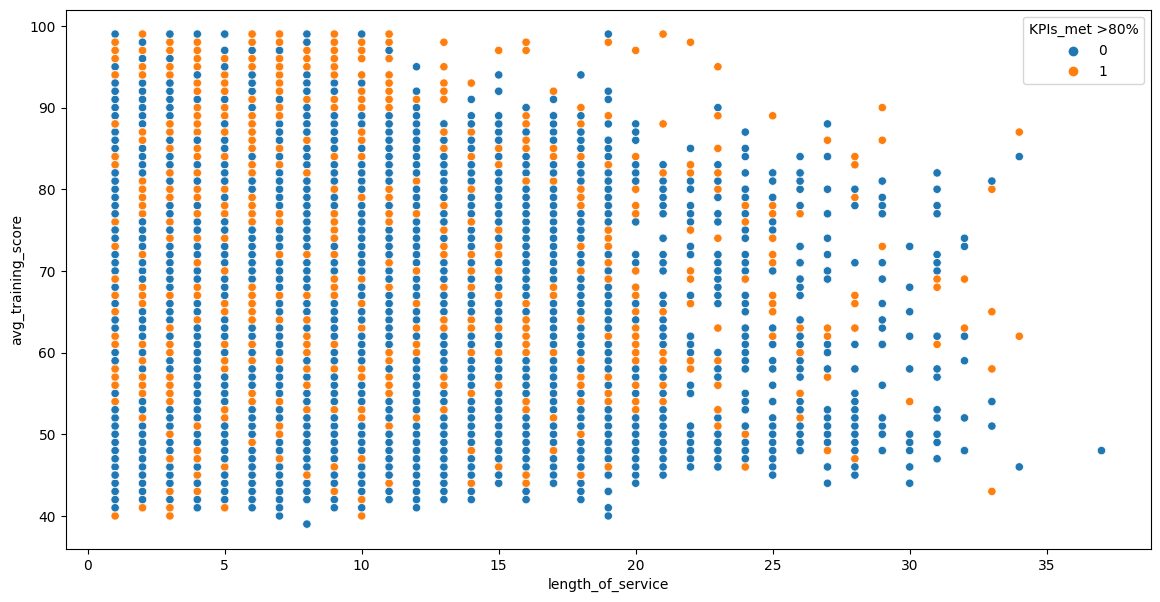

In [120]:
plt.figure(figsize = [14,7])

sns.scatterplot( x = df['length_of_service'] , y = df['avg_training_score'] , hue = df['KPIs_met >80%'] )

<Axes: xlabel='length_of_service', ylabel='age'>

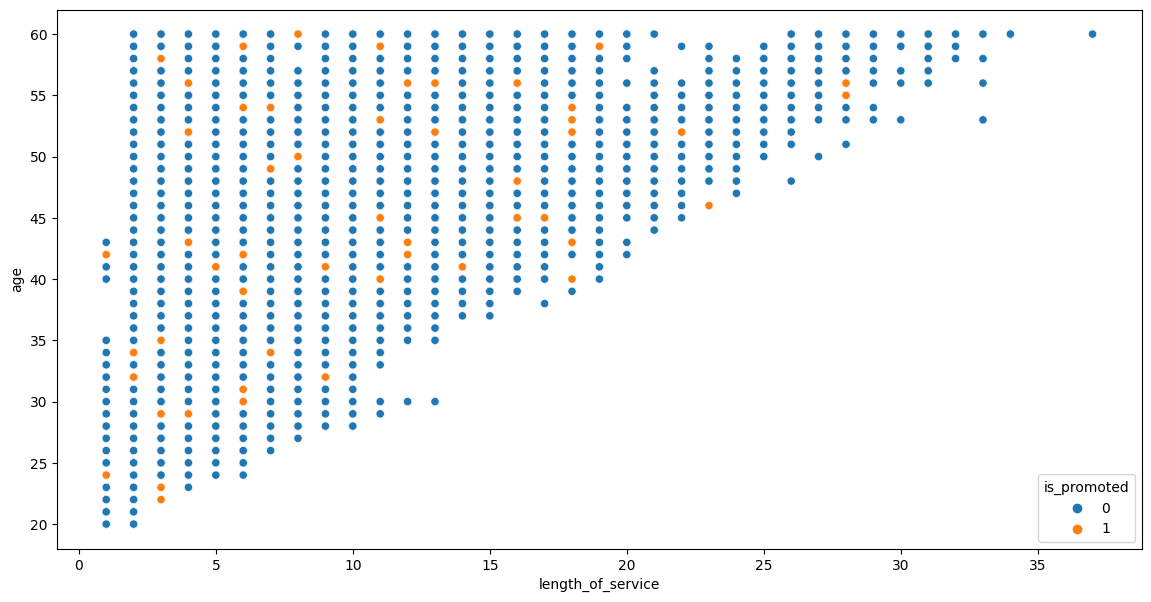

In [121]:
plt.figure(figsize = [14,7])

sns.scatterplot( x = df['length_of_service'] , y = df['age'] , hue = df['is_promoted'] )

### After analysing that graph we find that promotions are not depends upon the age and their lenght_of_service

<Axes: xlabel='length_of_service', ylabel='count'>

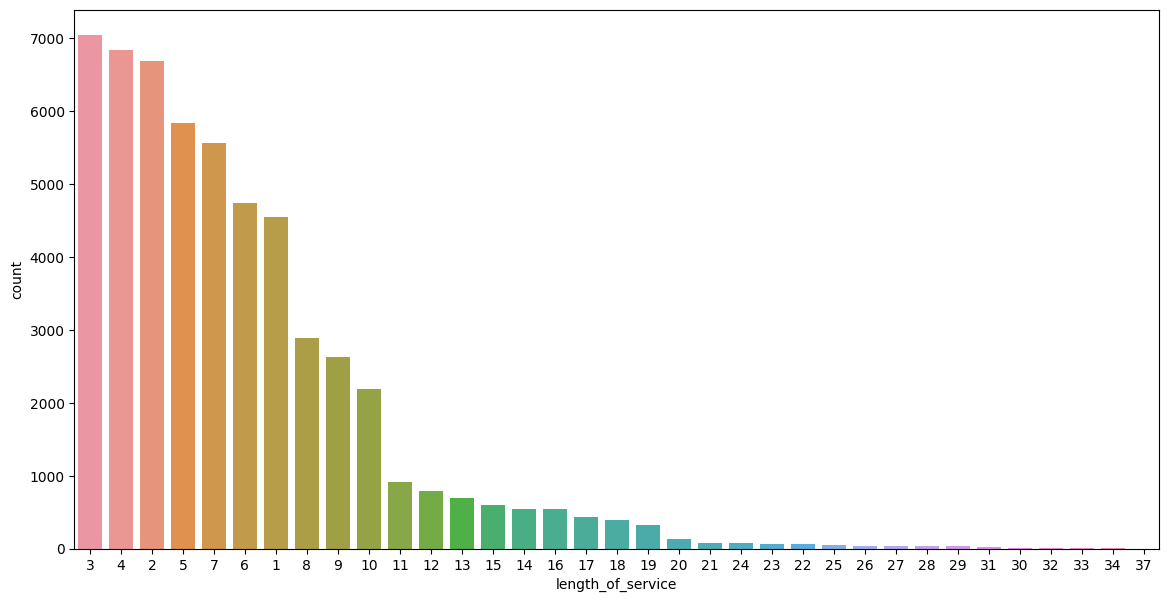

In [127]:
plt.figure(figsize = [14,7])

sns.countplot(x = df['length_of_service'] , order = df['length_of_service'].value_counts(ascending = False).index)

## 1 to 15 years of experienced employees are in very large group

<Axes: xlabel='length_of_service', ylabel='count'>

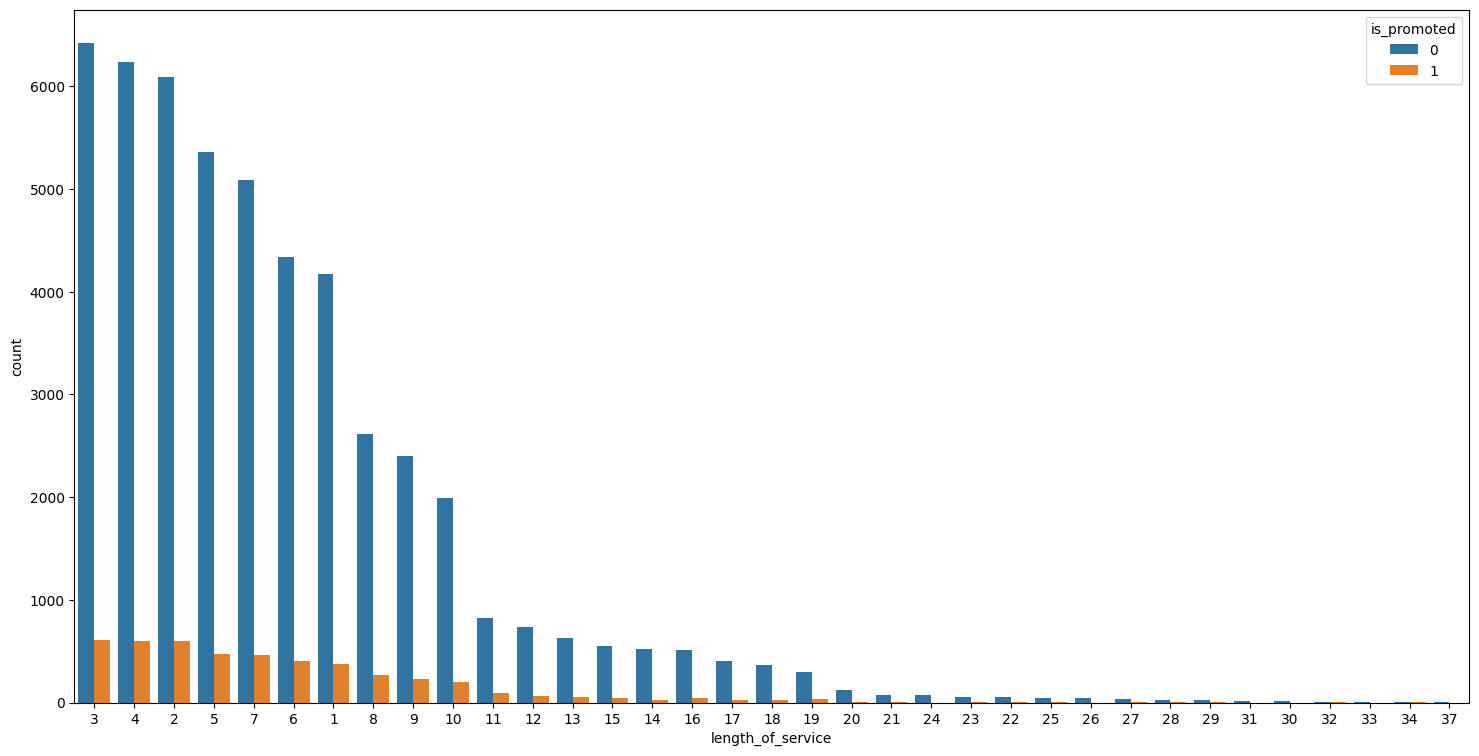

In [128]:
plt.figure(figsize = [18,9])

sns.countplot(x = df['length_of_service'] , order = df['length_of_service'].value_counts(ascending = False).index , 
             hue = df['is_promoted'])

## In this graph , we don't come to know any of the result from this graph as promotions is not depends upon the decades experience, we have to gain skills and analytical knowlenge .


### Now analysis for the region wise promotions 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

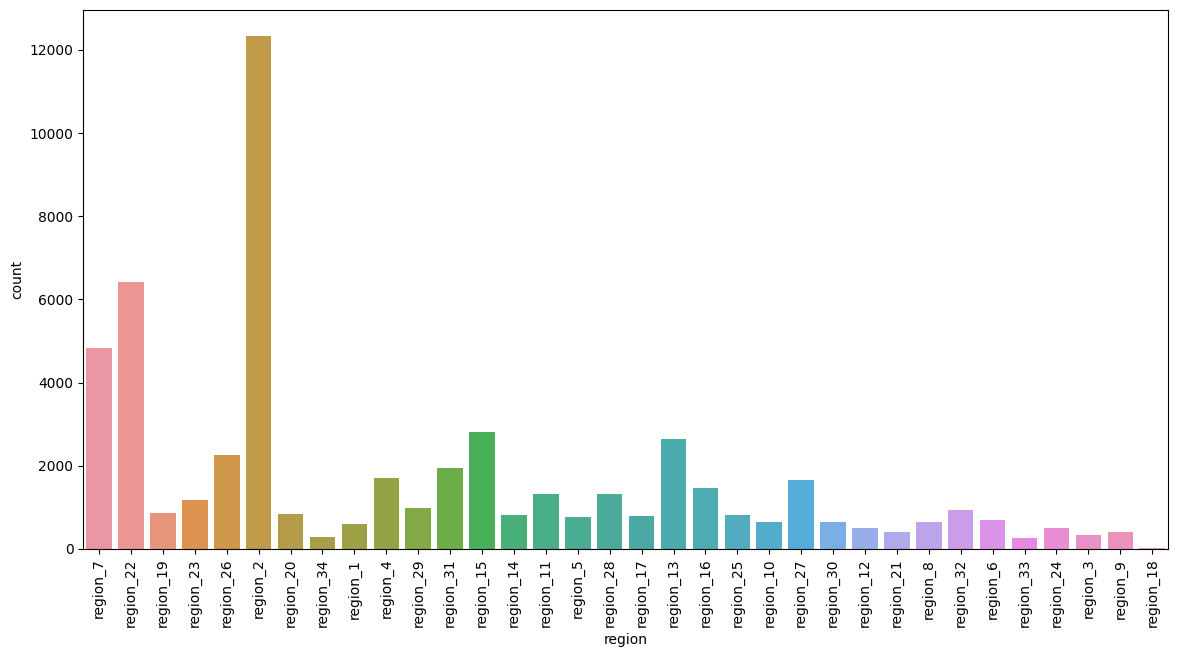

In [132]:
plt.figure(figsize = [14,7])

sns.countplot( x = df['region'] ) 

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

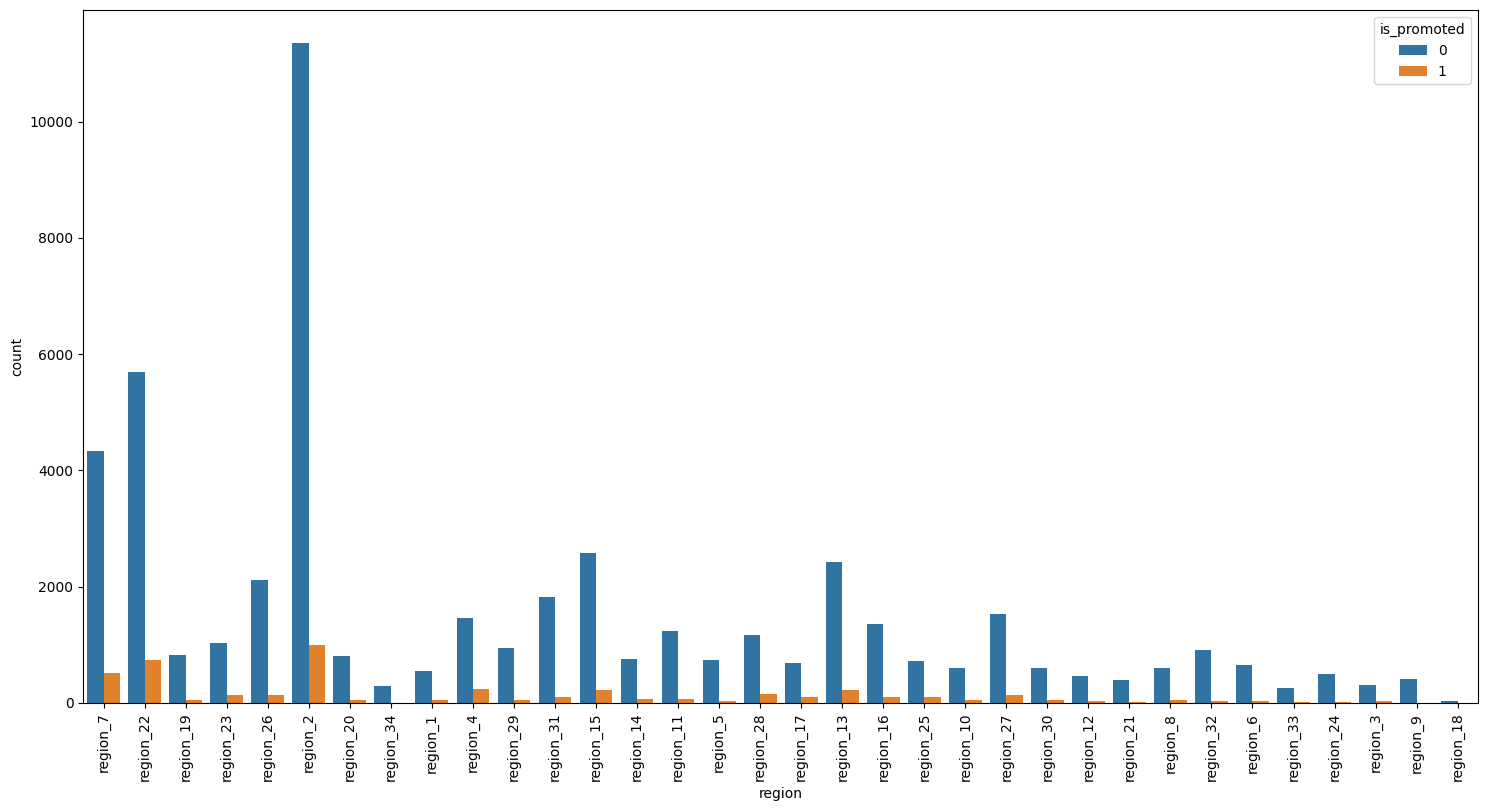

In [133]:
plt.figure(figsize = [18,9])

sns.countplot( x = df['region']  , hue = df['is_promoted']) 

plt.xticks(rotation = 90)

### As here I conculde my analysis region_2 has highest number of employees within their company , their company employees are spreaded in all over the regions for example region_7 , region_22 and region_15 are the regions where there are most of the employees are there and having the maximum number of promotions are there.

# Conclusion

#### 1. We can promote the employees which are newely entered in our MNC .
#### 2. Freshers with only of 1 year or less that 1 year experience are very talented one's if any of the parameter on which we have decided the promotions is successful then , we can promote those employees 
#### 3. Mostly Bachelor's degree employees are here in our company 
#### 4. Expericene with the less then 10 years of expericnce are promoted in bulk. 


#### 5. We can also promote the younger employees for growth in our company without consedering the all the any of 1 parameters  parameter for promotion is valid .

#### 6. I think the employees who have the previous_avg_rating above 3 with awards_won have to be promoted without consedering the KPIs_met >80% promote those employees 
#### 7. Techncology , Procuerment , Analytical department are most progressive departments of the company , they have to be promoted rapidly for growth of the company very easily . 
#### 8. No need to accelerate the promotions in Sales & Marketing they , are going at good pace. 
#### 9. Employees came from the sourcing recruitment_channel are performing well in the company , it means they are skilled and source is trusted. 
